# Aim of these two days

*Ideally*, you walk away from this workshop with the ability to <u>solve
whatever research problem you have with Julia and Turing.jl</u>

<div class="fragment (appear)>"

*Likely*, you walk away from this workshop with <u>slightly</u> better
understanding of how to solve your research problems with Julia and
Turing.jl + <u>a whole lot of questions</u>.

</div>
<div class="fragment (appear)>"

But we will do our best

</div>

# The story of a little Norwegian boy

There once was a little Norwegian boy

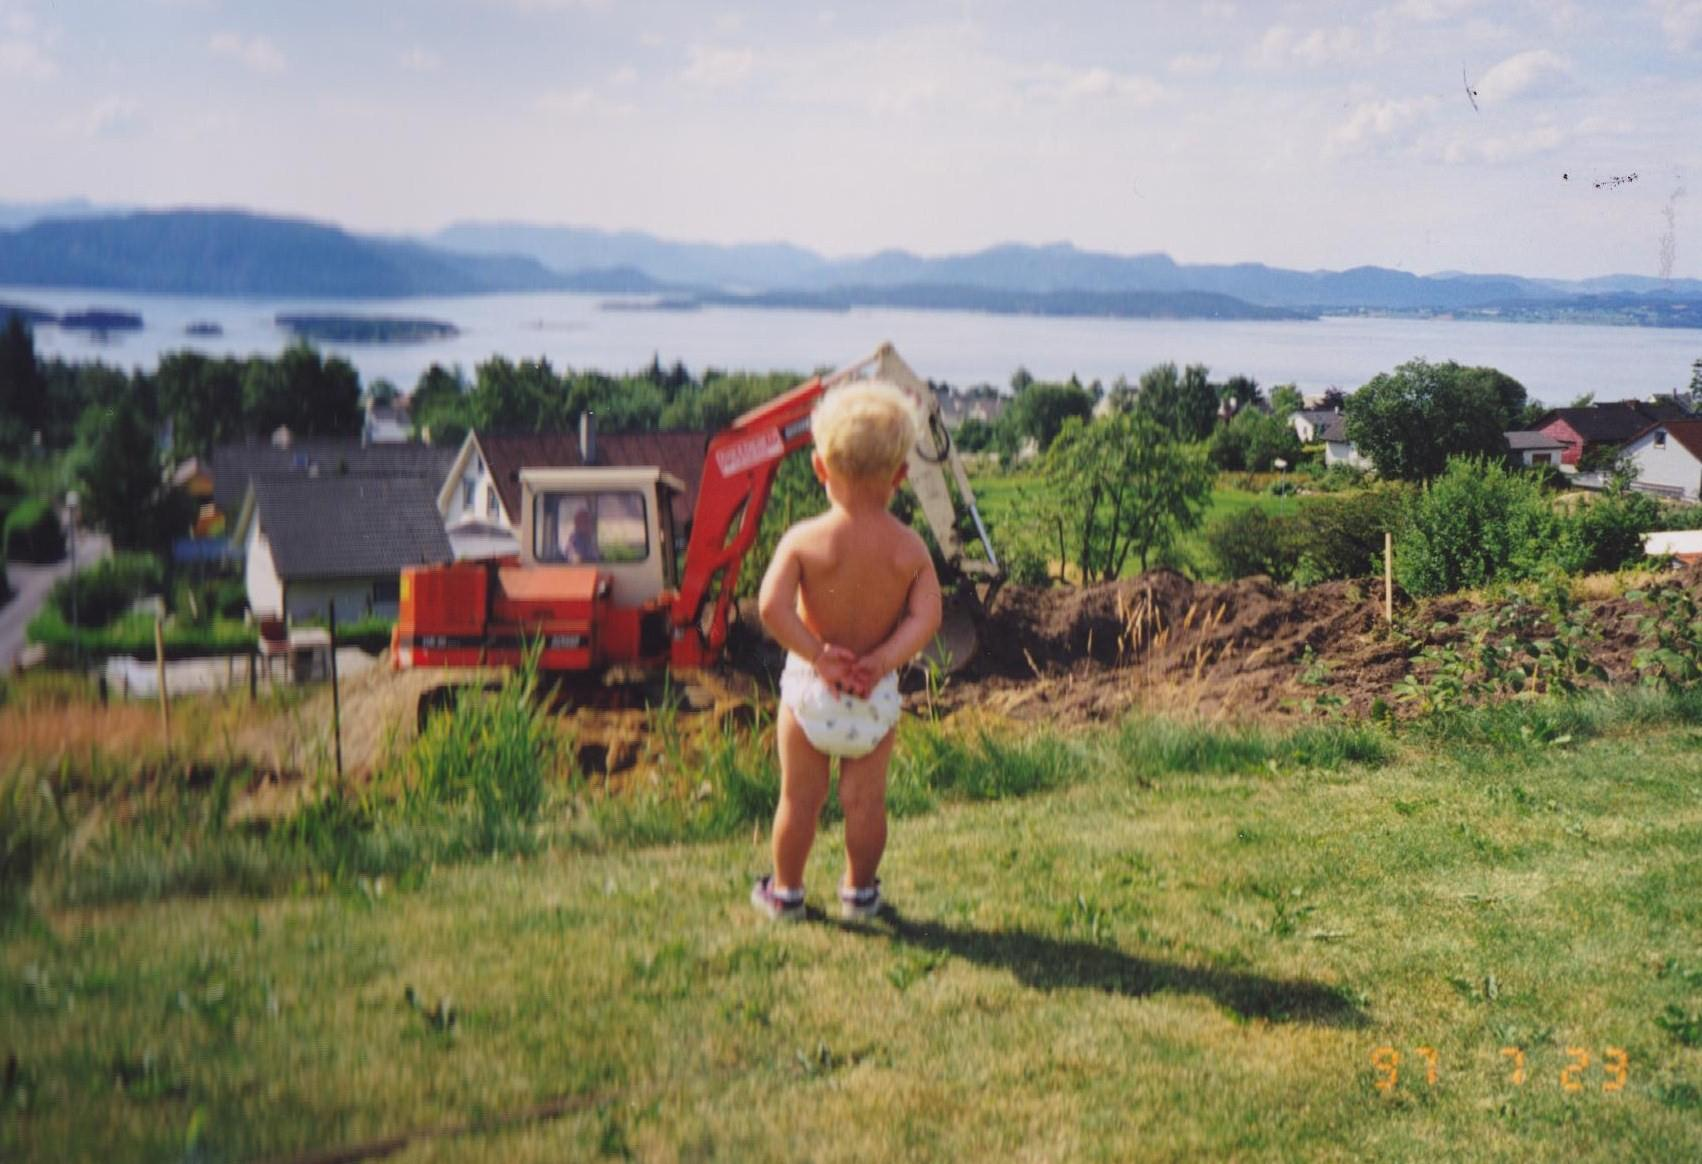

When this little boy was 20 years old, he was working as a parking guard
near Preikestolen/Pulpit rock

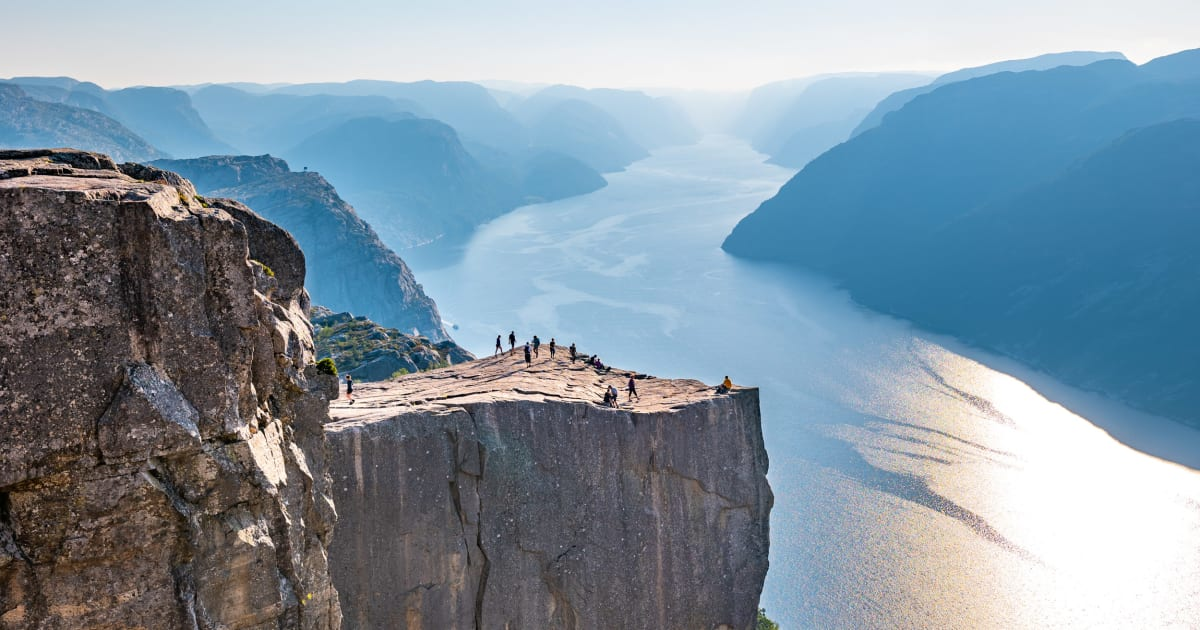

One day it was raining and there was nobody hiking, and so there was no
cars in sight for the little boy to point

<div class="fragment (appear)">

When his boss wasn't looking, the little 20 year-old boy had an amazing
idea

> Maybe I can use this method of Mr. Bayes I learned a bit about
> yesterday to model football / Premier League?

</div>

The little boy got very excited and started looking for stuff on the big
interwebs

The little boy came across this

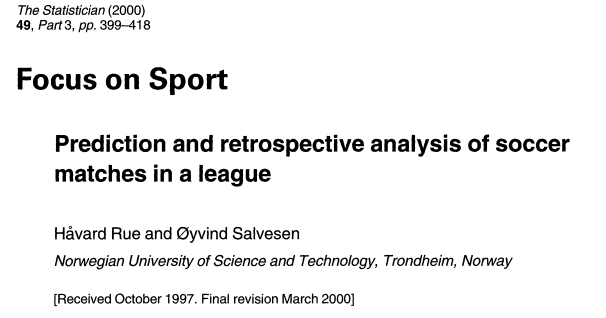

And got <u>very</u> excited

But at the time, the little boy knew next to <u>nothing</u> about
programming

The little boy couldn't write the code to do the inference

Whence the little boy became a <u>sad</u> little boy :(

But time heals all wounds, and at some point the little boy learned
Python

And in Python, the boy found the *probabilistic programming language*
`pymc3`

<div class="fragment (appear)">

> Maybe I can use `pymc3` to perform inference in that football /
> Premier League model?

And so the sad boy once more became an <u>excited</u> little boy :)

</div>
But there was a problem

The boy wanted to write a for-loop in his model, but the model didn't
want it to be so and complained!

The boy got frustrated and gave up, once more becoming a <u>sad</u>
little boy :(

<div class="small-text">

The boy should have known that the computational backend `theano` that
was used by `pymc3` at the time couldn't handle a for-loop, and instead
he should have used `scan`. But the boy was only 20-something years old;
he didn't know.

</div>
Some years later the boy discovers a programming language called
<u>Julia</u>

<div class="fragment (appear)">

Julia makes a few promises

1.  It's fast. Like *really* fast.
2.  It's interactive; doesn't require full compilation for you to play
    with it.
3.  You don't have to specify types everywhere.

</div>
<div class="fragment (appear)">

The boy thinks

> Wait, but this sounds like Python but the only difference is that…I
> CAN WRITE FOR-LOOPS WITHOUT FEELING BAD ABOUT IT?!

Yes, yes he could

And 3.5 years later, he's still writing for-loops. Well, sort of.

</div>

## But it really is fast

<figure>
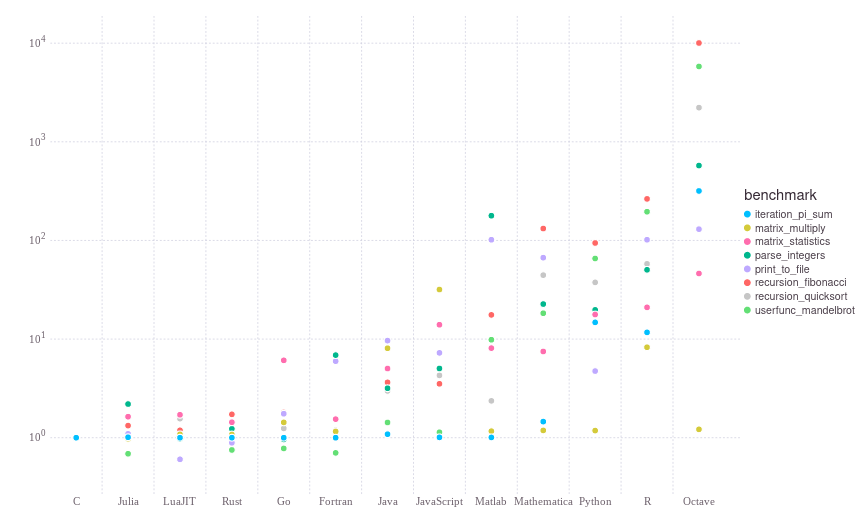
<figcaption><a
href="https://julialang.org/benchmarks/">https://julialang.org/benchmarks/</a>
(2023-01-18)</figcaption>
</figure>

And the consequences are

-   Even a naive implementation will be fairly fast!
    -   If you want to go faster, you just optimize the code *in Julia*!
    -   No need to drop down to C(++)
-   ⟹ "Every" package is written in Julia!
    -   Encountered a bug? Have to debug the <u>Julia</u> code
    -   Same language as you're writing in!
-   ⟹ Same for *extending* packages!
    -   Can change functions to experiment with code you don't even own!

<div class="fragment (appear)"

So all in all, it can be quite nice

</div>

# Before we begin

Make sure you're in the correct directory

``` julia
pwd()
```

Then run something like (depending on which OS you are on)

``` bash
julia --project
```

or if you're already in a REPL, do

``` julia
]activate .
```

to activate the project

And just to check that you're in the correct one

``` julia
]status
```

Download and install dependencies

``` julia
]instantiate
```

And finally, do

``` julia
using Part2
```

to get some functionality I've implemented for the occasion

# Base & Standard library

Julia is mainly a programing language for scientific computing

⟹ Julia comes with tons of useful functionality built-in

## `Base`

[`Base`](https://docs.julialang.org/en/v1/base/base/) is the only module
which is *always* imported

It contains the most fundamental functionality of the language, e.g.

``` julia
@which map
```

Relevant modules you'll find in `Base`

-   [Filesystem](https://docs.julialang.org/en/v1/base/file/)
-   [I/O and Network](https://docs.julialang.org/en/v1/base/io-network/)
-   [Iterators](https://docs.julialang.org/en/v1/base/iterators/)
-   [Threads](https://docs.julialang.org/en/v1/base/multi-threading/)

### Filesystem

``` julia
pwd()  # current working directory
```

``` julia
@which pwd
```

<https://docs.julialang.org/en/v1/base/file/>

While we're at it, let's make ourselves a directory for the outputs

``` julia
outputdir(args...) = joinpath("assets", "outputs", "more-julia", args...)
```

``` julia
outputdir()
```

``` julia
# Create it, if it doesn't exist
mkpath(outputdir())
```

### Multi-threading

``` julia
Threads
```

``` julia
Threads.nthreads()
```

Or we can call `using Threads` so so we don't have to write `Threads.`

``` julia
using Base.Threads
```

``` julia
nthreads()
```

Making use of the threads is trivial

``` julia
Threads.@threads for i in 1:10
    println("Thread $(Threads.threadid()): $i")
end
```

<https://docs.julialang.org/en/v1/base/multi-threading/>

## Standard library

These are all the packages that come with Julia but you explicitly have
to load with `using`

<div class="side-by-side">

-   [Pkg](https://docs.julialang.org/en/v1/stdlib/Pkg/)
-   [LinearAlgebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/)
-   [SparseArrays](https://docs.julialang.org/en/v1/stdlib/SparseArrays/)
-   [Statistics](https://docs.julialang.org/en/v1/stdlib/Statistics/)
-   [Random](https://docs.julialang.org/en/v1/stdlib/Random/)
-   [Distributed](https://docs.julialang.org/en/v1/stdlib/Distributed/)

</div>
<div class="side-by-side">

-   [Logging](https://docs.julialang.org/en/v1/stdlib/Logging/)
-   [Dates](https://docs.julialang.org/en/v1/stdlib/Dates/)
-   [Serialization](https://docs.julialang.org/en/v1/stdlib/Serialization/)
-   [Downloads](https://docs.julialang.org/en/v1/stdlib/Downloads/)
-   [Unit testing](https://docs.julialang.org/en/v1/stdlib/Test/)

</div>

### `Dates`

``` julia
using Dates
before = Dates.now()
```

``` julia
Dates.now() - before
```

``` julia
dump(before)
```

<https://docs.julialang.org/en/v1/stdlib/Dates/>

### `Random`

``` julia
using Random
```

We can set the "global" seed

``` julia
Random.seed!(1234)
```

``` julia
rand()
```

<div class="fragment (appear)>"

Or provide the RNG explicitly

``` julia
# Xoshiro is what Julia uses by default
rng = Random.Xoshiro(1234)
rand(rng) # <= same as before
```

</div>
<div class="fragment (appear)>"

Most functions using RNGs follow this pattern of optionally accepting an
RNG as the first argument

</div>
To sample multiple values, we just specify how many we want

``` julia
rand(3)
```

``` julia
rand(3, 3)
```

<div class="fragment (appear)>"

And we can also specify the type of the output

``` julia
rand(Float32)
```

</div>
And of course other standard sampling functions are available

``` julia
randn()
```

``` julia
randexp()
```

``` julia
# Sample uniformly from a vector
rand([1, 2, 3])
```

And more: <https://docs.julialang.org/en/v1/stdlib/Random/>

### `LinearAlgebra`

``` julia
A = [1 2 3; 4 1 6; 7 8 1]
```

``` julia
using LinearAlgebra

norm(A), dot(A[:, 1], A[:, 3])
```

``` julia
@which norm
```

Other functions are `det`, `dot`, `cholesky`, and much, much more.

<https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/>

### `SparseArrays`

``` julia
using SparseArrays
A_sparse = sparse([1, 1, 2, 3], [1, 3, 2, 3], [0, 1, 2, 0])
```

``` julia
dropzeros(A_sparse)
```

And standard array methods are applicable

``` julia
# `A` is the dense array from earlier
A * A_sparse
```

<https://docs.julialang.org/en/v1/stdlib/SparseArrays/>

### `Statistics`

``` julia
using Statistics
```

``` julia
mean(A), std(A)
```

<https://docs.julialang.org/en/v1/stdlib/Statistics/>

### `Distributed`

Functionality for parallel computation across workers (either local or
remote)

``` julia
using Distributed
nprocs()
```

``` julia
# Spawn a local worker
addprocs(1)
```

``` julia
# Spawn a remote worker (this machine won't work on your computer)
addprocs(["tor@beastly"], tunnel=true, dir="/tmp/")
```

``` julia
nprocs()
```

``` julia
# Define something on all workers
@everywhere function hostname_and_number(i)
    # Execute shell command on worker to get hostname.
    # NOTE: Using `...` syntax for shell commands.
    # This creates a `Cmd`, which is run once we call `read on it.
    hostname = read(`hostname`, String)
    # Return a tuple of worker ID, hostname and the number.
    return (myid(), i, chomp(hostname))
end
```

``` julia
# Run the function on all workers
pmap(hostname_and_number, 1:12)
```

<https://docs.julialang.org/en/v1/stdlib/Distributed/>

### `Logging`

``` julia
A = ones(Int, 4, 4)
v = ones(100)
@info "Some variables"  A  s=sum(v)
```

We can also change the logger for a particular block of code

``` julia
using Logging
with_logger(NullLogger()) do
    @info "Some variables"  A  s=sum(v)
end
```

<https://docs.julialang.org/en/v1/stdlib/Logging/>

## TASK Estimate $\pi$

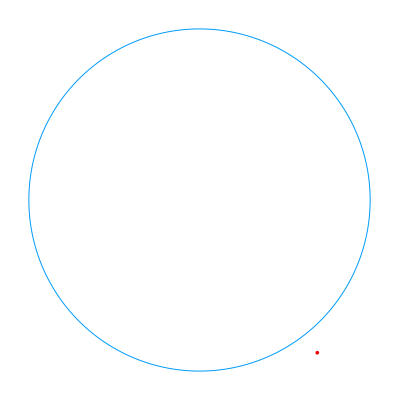

**Extra:** Parallelize it.

``` julia
# Some space so you don't cheat.



















# Are you sure?
```

## SOLUTION Estimate $\pi$

Well, Julia has irrational numbers built-in

``` julia
π
```

So you could just do

``` julia
Float64(π)
```

But that's not fair.

``` julia
num_within = 0; num_total = 1_000_000
for i in 1:num_total
    x = 2 .* rand(2) .- 1
    if norm(x) < 1
        num_within += 1
    end
end
# Area of a circle = πr^2 = π * (1/2)^2 = π/4
4 * num_within / num_total
```

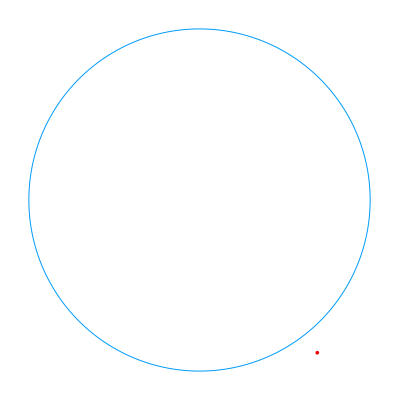

# Scientific computing ecosystem

<div class="side-by-side">

-   [DataFrames.jl](https://dataframes.juliadata.org/stable/), etc.
-   [Plots.jl](https://docs.juliaplots.org/stable/), etc.
-   [Distributions.jl](https://juliastats.org/Distributions.jl/stable/),
    etc.
-   [Optimization.jl](https://docs.sciml.ai/Optimization/stable/) and
    all it contains

</div>
<div class="side-by-side">

-   [DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/)
-   Deep learning, e.g. [Flux.jl](https://fluxml.ai/Flux.jl/stable/)
-   Automatic Differentiation
-   BenchmarkTools.jl

</div>

And more, of course

# Running example

An outbreak of influenza A (H1N1) in 1978 at a British boarding school

-   763 male students -\> 512 of which became ill
-   Reported that one infected boy started the epidemic
-   Observations are number of boys in bed over 14 days

Data are freely available in the R package `outbreaks`, maintained as
part of the [R Epidemics
Consortium](http://www.repidemicsconsortium.org/)

# DataFrames.jl

``` julia
using DataFrames
```

In Julia, the go-to for working with datasets is `DataFrames.jl`

<div class="small-text">

If you don't want to let go of the `tidyverse` and you don't mind a
bunch of magic, you can use <https://github.com/TidierOrg/Tidier.jl>

</div>
If you're already familiar with equivalents in R or Python, the
following is a great reference:
<https://dataframes.juliadata.org/stable/man/comparisons/>

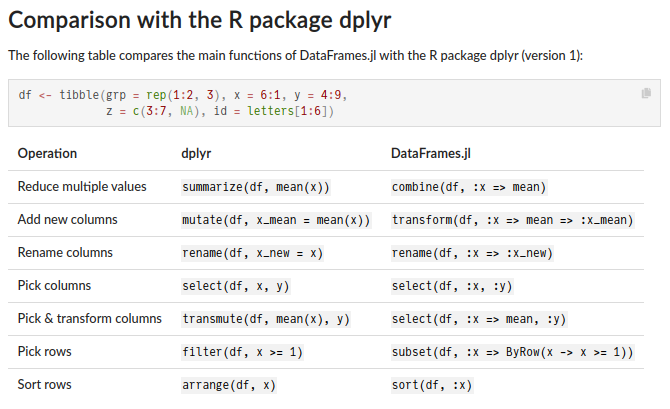

There are many different ways to construct a `DataFrame`

``` julia
df = DataFrame(A=1:3, B=5:7, fixed=1)
```

``` julia
DataFrame(Dict("A" => 1:3, "B" => 5:7, "fixed" => 1))
```

Notice that columns are typed

Then we can interact with the `DataFrame` in a variety of ways

For example: indexing

``` julia
df.A
```

``` julia
df."A"  # useful when column-names aren't valid Julia symbols
```

``` julia
df[:, "A"]
```

``` julia
df[:, [:A, :B]]
```

``` julia
df[:, Not(:fixed)]
```

All the standard functions are available, e.g.

-   `select`
-   `transform`
-   `groupby`
-   Different forms of `join`
-   Etc.

There are too many functions to go through

See the docs <https://dataframes.juliadata.org/stable/> for a thorough
overview

## Actual data

Let's load the actual data

Our data is a CSV file

``` julia
readdir("data")
```

Functionality for different file formats is usually provided by separate
packages:

-   [CSV.jl](https://github.com/JuliaData/CSV.jl)
-   [Arrow.jl](https://github.com/JuliaData/Arrow.jl) (Apache Arrow)
-   [RData.jl](https://github.com/JuliaData/RData.jl) (R data files)
-   [XLSX.jl](https://felipenoris.github.io/XLSX.jl/stable/) (Excel
    files)
-   And more.

In our case, we're working with a CSV file, so we'll use `CSV.jl`:

``` julia
using CSV
datafile = CSV.File(joinpath("data", "influenza_england_1978_school.csv"));
```

And then we can convert this `CSV.File` into a `DataFrame`

``` julia
data = DataFrame(datafile)
```

> Woah, how does this work? We just passed a `CSV.File` to
> `DataFrames.DataFrame`, and <u>it just works</u>?!

Aye, that's right

This is thanks to [Tables.jl](https://tables.juliadata.org/stable/), a
simple interface for tabular data

Such light-weight interface packages allow modules to seemlessly
interact with each other without explicit dependencies

This is a very typical pattern in Julia

# Distributions.jl

``` julia
using Distributions
```

In Julia, the go-to for working with distributions is
[`Distributions.jl`](https://juliastats.org/Distributions.jl/stable/)

This package provides a large number of distributions

Used throughout the Julia community, e.g. `Turing` uses this

``` julia
dist = Normal()
```

``` julia
mean(dist), var(dist)
```

Remeber the `Random.rand` function from earlier? This now also accepts a
`Distribution`

``` julia
x = rand(dist)
```

``` julia
logpdf(dist, x)
```

``` julia
cdf(dist, 0.5)
```

``` julia
quantile.(Normal(), [0.05, 0.5, 0.95])
```

There is also maximum likelihood estimation (MLE)

``` julia
xs = rand(Normal(1, 2), 100)
fit(Normal, xs)
```

But exactly what distributions are there?

Well, we can just check by inspecting the subtypes of `Distribution`

``` julia
# Filter away abstract types.
nonabstract_dist_subtypes = filter(!isabstracttype, subtypes(Distribution))
# Filter away types which are not found in Distributions.jl.
dist_types_from_distributions = filter(
    Base.Fix1(hasproperty, Distributions) ∘ Symbol,
    nonabstract_dist_subtypes
)
```

Okay, there are a bit too many

Let's separate between different variate types

``` julia
filter(x -> x <: UnivariateDistribution, dist_types_from_distributions)
```

Too many

Let's convert it into a `Matrix` and force Julia to show all columns

``` julia
show(
    IOContext(stdout, :limit => false),
    "text/plain",
    reshape(filter(x -> x <: UnivariateDistribution, dist_types_from_distributions), 10, :)
)
```

Now for multivariate distributions

``` julia
filter(x -> x <: MultivariateDistribution, dist_types_from_distributions)
```

<div class="fragment (appear)>"

And matrix distributions

``` julia
filter(x -> x <: MatrixDistribution, dist_types_from_distributions)
```

</div>

# Plots.jl

``` julia
using Plots
```

The most commonly used plotting library is
[Plots.jl](https://docs.juliaplots.org/stable/)

Has many backends, including:

-   GR
-   PyPlot
-   Plotly
-   Unicode
-   PGFPlots
-   And more

<u>But</u> the code is the same for all backends

``` julia
# GR is used by default
Plots.backend()
```

<div class="side-by-side">
<div>

``` julia
p1 = plot(1:10, rand(10), size=(450, 200))
```

</div>
<div>

``` julia
p2 = scatter(1:10, rand(10), size=(450, 200))
```

</div>
</div>

``` julia
plot(p1, p2, layout=(1, 2), size=(800, 200))
```

A neat example from [the
docs](https://docs.juliaplots.org/stable/#simple-is-beautiful)

``` julia
# Define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()
```

``` julia
# Initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2,
)

# Build an animated gif by pushing new points to the plot, saving every 10th frame
anim = @animate for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10
gif(anim, outputdir("lorenz.gif"));
```

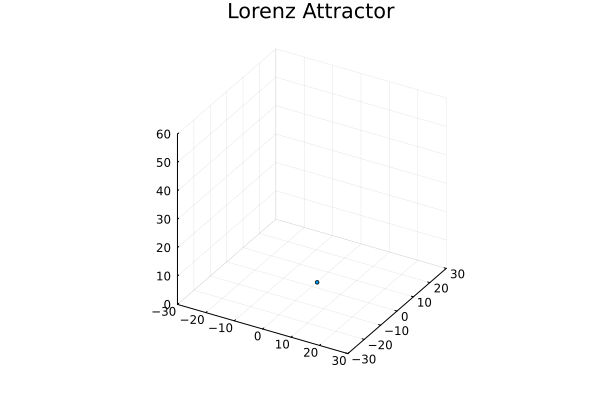

## Ecosystem

Plots.jl also has a very nice recipe-system

Allows you to define how to plot your own types

As a result, packages often define customized plotting recipes for their
types

<https://docs.juliaplots.org/latest/ecosystem/#Community-packages>

## StatsPlots.jl

For us, [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl) is
particularly relevant

``` julia
using StatsPlots
```

It contains custom plotting functionality for dataframes and
distibutions

``` julia
plot(Normal())
```

It also contains the macro `@df` for working with dataframes

``` julia
@df data scatter(:date, :in_bed, label=nothing, ylabel="Number of students in bed")
```

# DifferentialEquations.jl

``` julia
using DifferentialEquations
```

Everything related to differential equations is provided by
[`DifferentialEquations.jl`](https://docs.sciml.ai/DiffEqDocs/stable/)
and the [SciML ecosystem](https://sciml.ai/)

And I really do mean
[*everything*](https://docs.sciml.ai/DiffEqDocs/stable/)

<div class="side-by-side">
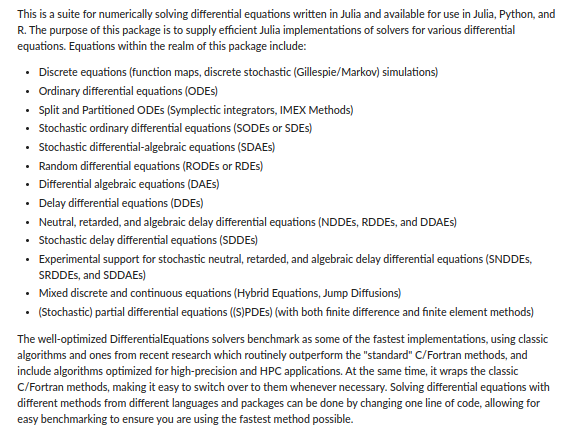

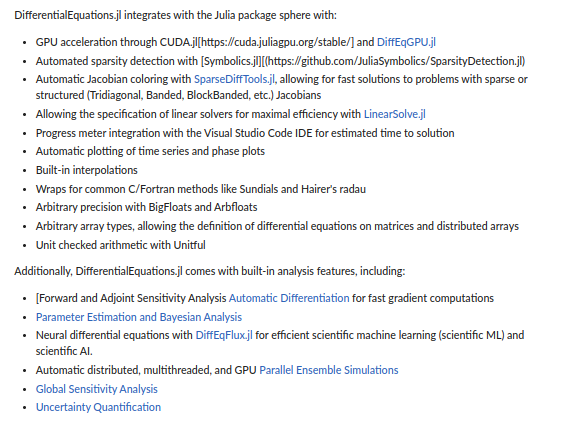

</div>

## Differential equations

Suppose we have some function $f$ which describes how a state $x$
evolves wrt. $t$

\begin{equation*}
\frac{\mathrm{d} x}{\mathrm{d} t} = f(x, t)
\end{equation*}

which we then need to integrate to obtain the actual state at some time
$t$

\begin{equation*}
x(t) = \int_{0}^{t} \frac{\mathrm{d} x}{\mathrm{d} t} \mathrm{d} t = \int_{0}^{t} f(x, t) \mathrm{d} t
\end{equation*}

In many interesting scenarios numerical methods are required to obtain
$x(t)$

## Example: SIR model

One particular example of an (ordinary) differential equation that you
might have seen recently is the **SIR model** used in epidemiology

<figure>
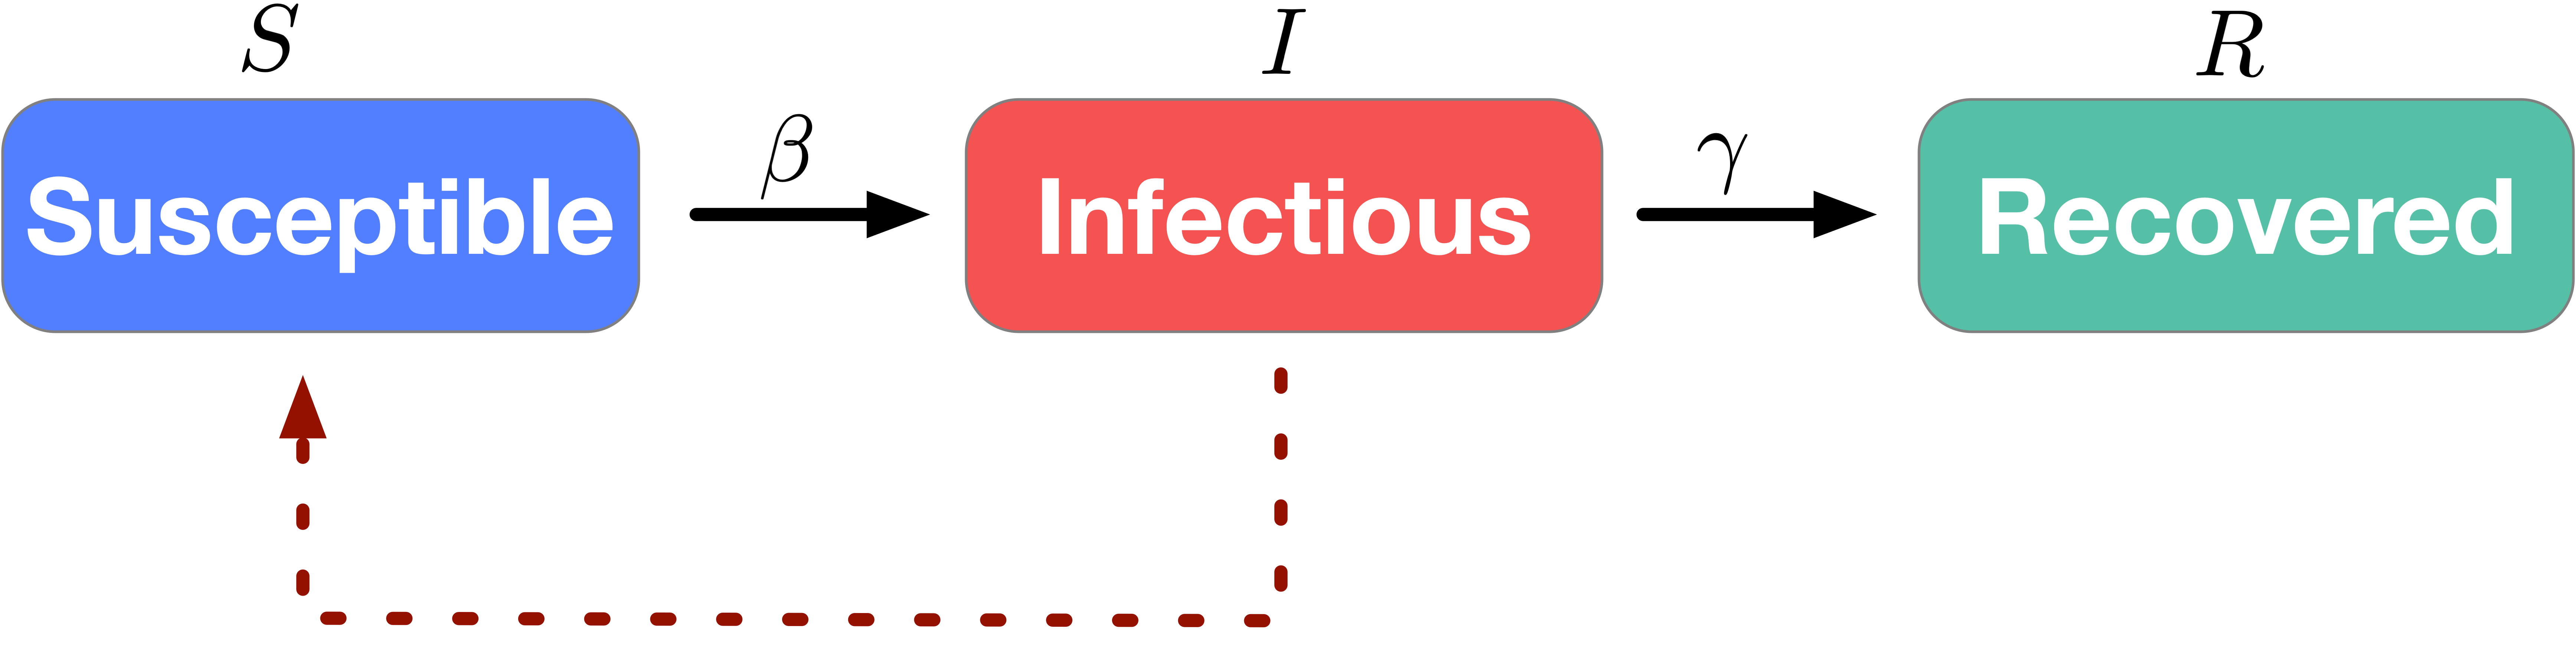
<figcaption><a
href="https://covid19.uclaml.org/model.html">https://covid19.uclaml.org/model.html</a>
(2023-01-19)</figcaption>
</figure>

The temporal dynamics of the sizes of each of the compartments are
governed by the following system of ODEs:

\begin{equation*}
\begin{split}
  \frac{\mathrm{d} S}{\mathrm{d} t} &= - \beta S \frac{I}{N} \\
  \frac{\mathrm{d} I}{\mathrm{d} t} &= \beta S \frac{I}{N} - \gamma I \\
  \frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I
\end{split}
\end{equation*}

where

-   $S(t)$ is the number of people susceptible to becoming infected,
-   $I(t)$ is the number of people currently infected,
-   $R(t)$ is the number of recovered people,
-   $β$ is the constant rate of infectious contact between people,
-   $\gamma$ the constant recovery rate of infected individuals

Converting this ODE into code is just

``` julia
const N = 763 # size of population

function SIR!(
    du,  # buffer for the updated differential equation
    u,   # current state
    p,   # parameters
    t    # current time
)
    S, I, R = u
    β, γ = p

    du[1] = dS = -β * I * S / N
    du[2] = dI = β * I * S / N - γ * I
    du[3] = dR = γ * I
end
```

Not too bad!

Initial conditions are then

\begin{equation*}
\begin{split}
  S(0) &= N - 1 \\
  I(0) &= 1 \\
  R(0) &= 0
\end{split}
\end{equation*}

and we want to integrate from $t = 0$ to $t = 14$

``` julia
# Include 0 because that's the initial condition before any observations.
tspan = (0.0, 14.0)

# Initial conditions are:
#   S(0) = N - 1; I(0) = 1; R(0) = 0
u0 = [N - 1, 1, 0.0]
```

Now we just need to define the overall problem and we can solve:

``` julia
# Just to check that everything works, we'll just use some "totally random" values for β and γ:
problem_sir = let β = 2.0, γ = 0.6
    ODEProblem(SIR!, u0, tspan, (β, γ))
end
```

Aaaand

``` julia
sol = solve(problem_sir)
```

We didn't specify a solver

DifferentialEquations.jl uses `AutoTsit5(Rosenbrock32())` by default

Which is a composition between

-   `Tsit5` (4th order Runge-Kutta), and
-   `Rosenbrock32` (3rd order stiff solver)

with automatic switching between the two

`AutoTsit5(Rosenbrock32())` covers many use-cases well, but see

-   <https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/>
-   <https://www.stochasticlifestyle.com/comparison-differential-equation-solver-suites-matlab-r-julia-python-c-fortran/>

for more info on choosing a solver

This is the resulting solution

``` julia
plot(
    sol,
    linewidth=2, xaxis="Time in days", label=["Suspectible" "Infected" "Recovered"],
    alpha=0.5, size=(500, 300)
)
scatter!(1:14, data.in_bed, label="Data", color="black")
```

This doesn't really match the data though; let's do better

**Approach #1:** find optimal values of $\beta$ and $\gamma$ by
minimizing some loss, e.g. sum-of-squares

\begin{equation*}
\ell(\beta, \gamma) = \sum_{i = 1}^{14} \bigg( F(u_0, t_i;\ \beta, \gamma) - y_i \bigg)^2
\end{equation*}

where $\big( y_i \big)_{i = 1}^{14}$ are the observations, $F$ is the
integrated system

## Optimization.jl

In Julia, there are *tons* of packages for performing all kinds of
optimization

[Optimization.jl](https://docs.sciml.ai/Optimization/stable/) provides a
convenient interface to many of them

``` julia
using Optimization
```

<figure>
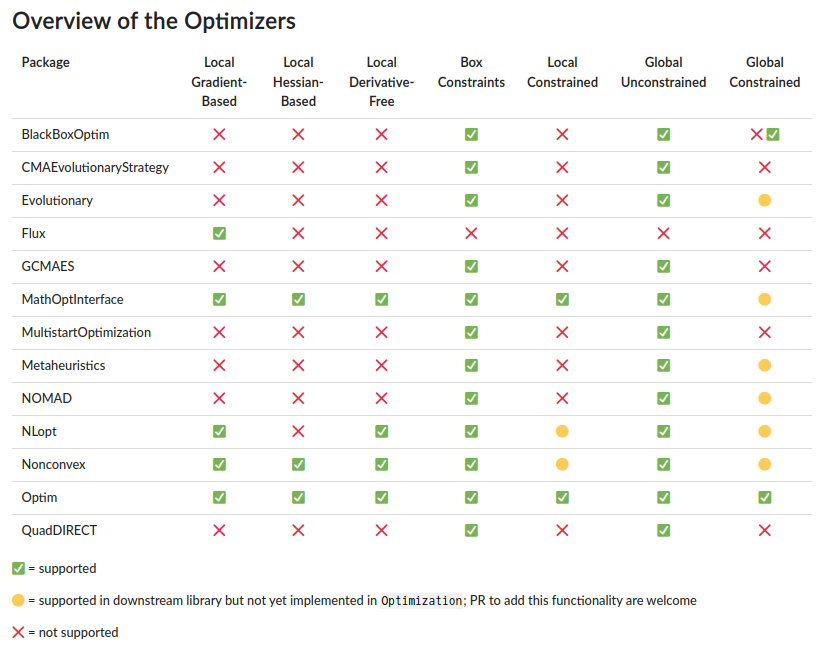
<figcaption><a
href="https://docs.sciml.ai/Optimization/stable/#Overview-of-the-Optimizers">https://docs.sciml.ai/Optimization/stable/#Overview-of-the-Optimizers</a>
(2023-09-15)</figcaption>
</figure>

<div class="small-text">

Recall we want to solve

\begin{equation*}
\min_{\beta, \gamma} \sum_{i = 1}^{14} \bigg( F(u_0, t_i;\ \beta, \gamma) - y_i \bigg)^2
\end{equation*}

where $\big( y_i \big)_{i = 1}^{14}$ are the observations, $F$ is the
integrated system

</div>
<div class="fragment (appear)">

First we define the loss

``` julia
# Define the loss function.
function loss_sir(problem_orig, p)
    # `remake` just, well, remakes the `problem` with parameters `p` replaced.
    problem = remake(problem_orig, p=p)
    # To ensure we get solutions _exactly_ at the timesteps of interest,
    # i.e. every day we have observations, we use `saveat=1` to tell `solve`
    # to save at every timestep (which is one day).
    sol = solve(problem, saveat=1)
    # Extract the 2nd state, the (I)infected, for the dates with observations.
    sol_for_observed = sol[2, 2:15]
    # Compute the sum-of-squares of the infected vs. data.
    return sum(abs2.(sol_for_observed - data.in_bed))
end
```

</div>
Then we can define our `OptimizationProblem`

``` julia
opt_problem = OptimizationProblem(
    OptimizationFunction(
        (p,_) -> loss_sir(problem_sir, p), # function to minimize
        Optimization.AutoForwardDiff()     # use ForwardDiff for automatic differentiation
    ),
    [2.0, 0.5],                            # initial values
    lb = [0, 0],                           # lower bounds on variables
    ub = [Inf, Inf],                       # upper bounds on variables
) 
```

And for general *deterministic* problems,
[Optim.jl](https://julianlsolvers.github.io/Optim.jl/stable/) is a good
choice

``` julia
using OptimizationOptimJL
opt = solve(opt_problem, NelderMead())
```

``` julia
β, λ = opt
β, λ
```

``` julia
# Solve the problem with the obtained parameters.
problem_sir = remake(problem_sir, p=(β, λ))
sol = solve(problem_sir)

# Plot the solution.
plot(sol, linewidth=2, xaxis="Time in days", label=["Susceptible" "Infected" "Recovered"], alpha=0.5)
# And the data.
scatter!(1:14, data.in_bed, label="Data", color="black")
```

That's better than our *totally* "random" guess from earlier!

## Example: SEIR model

Adding another compartment to our SIR model: the <u>(E)xposed</u> state

\begin{equation*}
\begin{split}
  \frac{\mathrm{d} S}{\mathrm{d} t} &= - \beta S \frac{I}{N} \\
  \frac{\mathrm{d} {\color{blue} E}}{\mathrm{d} t} &= \beta S \frac{I}{N} - {\color{orange} \sigma} {\color{blue} E} \\
  \frac{\mathrm{d} I}{\mathrm{d} t} &= {\color{orange} \sigma} {\color{blue} E} - \gamma I \\
  \frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I
\end{split}
\end{equation*}

where we've added a new parameter ${\color{orange} \sigma}$ describing
the fraction of people who develop observable symptoms in this time

## TASK Solve the SEIR model using Julia

``` julia
function SEIR!(
    du,  # buffer for the updated differential equation
    u,   # current state
    p,   # parameters
    t    # current time
)
    N = 763  # population

    S, E, I, R = u  # have ourselves an additional state!
    β, γ, σ = p     # and an additional parameter!

    # TODO: Implement yah fool!
    du[1] = nothing
    du[2] = nothing
    du[3] = nothing
    du[4] = nothing
end
```

**BONUS:** find minimizers of sum-of-squares

``` julia
# Some space so you don't cheat.



















# Are you sure?
```

## SOLUTION Solve the SEIR model using Julia

``` julia
function SEIR!(
    du,  # buffer for the updated differential equation
    u,   # current state
    p,   # parameters
    t    # current time
)
    N = 763  # population
    S, E, I, R = u  # have ourselves an additional state!
    β, γ, σ = p     # and an additional parameter!

    # Might as well cache these computations.
    βSI = β * S * I / N
    σE = σ * E
    γI = γ * I

    du[1] = -βSI
    du[2] = βSI - σE
    du[3] = σE - γI
    du[4] = γI
end
```

``` julia
problem_seir = let u0 = [N - 1, 0, 1, 0], β = 2.0, γ = 0.6, σ = 0.8
    ODEProblem(SEIR!, u0, tspan, (β, γ, σ))
end
```

``` julia
sol_seir = solve(problem_seir, saveat=1)
```

``` julia
plot(sol_seir, linewidth=2, xaxis="Time in days", label=["Susceptible" "Exposed" "Infected" "Recovered"], alpha=0.5)
scatter!(1:14, data.in_bed, label="Data")
```

Don't look so good. Let's try Optim.jl again.

``` julia
function loss_seir(problem, p)
    problem = remake(problem, p=p)
    sol = solve(problem, saveat=1)
    # NOTE: 3rd state is now the (I)nfectious compartment!!!
    sol_for_observed = sol[3, 2:15]
    return sum(abs2.(sol_for_observed - data.in_bed))
end
```

``` julia
opt_problem = OptimizationProblem(
    OptimizationFunction(
        (p,_) -> loss_seir(problem_seir, p), # function to minimize
        Optimization.AutoForwardDiff()       # use ForwardDiff for automatic differentiation
    ),
    [2.0, 0.5, 0.9],                         # initial values
    lb = [0, 0, 0],                          # lower bounds on variables
    ub = [Inf, Inf, Inf],                    # upper bounds on variables
)
```

``` julia
opt = solve(opt_problem, NelderMead())
```

``` julia
β, γ, σ = opt
```

``` julia
sol_seir = solve(remake(problem_seir, p=(β, γ, σ)), saveat=1)
plot(sol_seir, linewidth=2, xaxis="Time in days", label=["Susceptible" "Exposed" "Infected" "Recovered"], alpha=0.5)
scatter!(1:14, data.in_bed, label="Data", color="black")
```

> But…but these are <u>point estimates</u>! What about distributions?
> WHAT ABOUT UNCERTAINTY?!

No, no that's fair.

Let's do some Bayesian inference then.

BUT FIRST!

## Making our future selves less annoyed

It's annoying to have all these different loss-functions for *both*
`SIR!` and `SEIR!`

<div class="fragment (appear)">

``` julia
# Abstract type which we can use to dispatch on.
abstract type AbstractEpidemicProblem end

struct SIRProblem{P} <: AbstractEpidemicProblem
    problem::P
    N::Int
end

function SIRProblem(N::Int; u0 = [N - 1, 1, 0.], tspan = (0, 14), p = [2.0, 0.6])
    return SIRProblem(ODEProblem(SIR!, u0, tspan, p), N)
end
```

Then we can just construct the problem as

``` julia
sir = SIRProblem(N);
```

</div>
And to make it a bit easier to work with, we add some utility functions

``` julia
# General.
parameters(prob::AbstractEpidemicProblem) = prob.problem.p
initial_state(prob::AbstractEpidemicProblem) = prob.problem.u0
population(prob::AbstractEpidemicProblem) = prob.N

# Specializations.
susceptible(::SIRProblem, u::AbstractMatrix) = u[1, :]
infected(::SIRProblem, u::AbstractMatrix) = u[2, :]
recovered(::SIRProblem, u::AbstractMatrix) = u[3, :]
```

So that once we've solved the problem, we can easily extract the
compartment we want, e.g.

``` julia
sol = solve(sir.problem, saveat=1)
infected(sir, sol)
```

## TASK Implement `SEIRProblem`

``` julia
struct SEIRProblem <: AbstractEpidemicProblem
    # ...
end

function SEIRProblem end

susceptible
exposed
infected
recovered
```

``` julia
# Some space so you don't cheat.



















# Are you sure?
```

## SOLUTION Implement `SEIRProblem`

``` julia
struct SEIRProblem{P} <: AbstractEpidemicProblem
    problem::P
    N::Int
end

function SEIRProblem(N::Int; u0 = [N - 1, 0, 1, 0.], tspan = (0, 14), p = [4.5, 0.45, 0.8])
    return SEIRProblem(ODEProblem(SEIR!, u0, tspan, p), N)
end

susceptible(::SEIRProblem, u::AbstractMatrix) = u[1, :]
exposed(::SEIRProblem, u::AbstractMatrix) = u[2, :]
infected(::SEIRProblem, u::AbstractMatrix) = u[3, :]
recovered(::SEIRProblem, u::AbstractMatrix) = u[4, :]
```

Now, given a `problem` and a `sol`, we can query the `sol` for the
`infected` state <u>without explicit handling of which `problem` we're
working with</u>

``` julia
seir = SEIRProblem(N);
sol = solve(seir.problem, saveat=1)
infected(seir, sol)
```

## Same `loss` for both!

``` julia
function loss(problem_wrapper::AbstractEpidemicProblem, p)
    # NOTE: Extract the `problem` from `problem_wrapper`.
    problem = remake(problem_wrapper.problem, p=p)
    sol = solve(problem, saveat=1)
    # NOTE: Now this is completely general!
    sol_for_observed = infected(problem_wrapper, sol)[2:end]
    return sum(abs2.(sol_for_observed - data.in_bed))
end
```

Now we can call the <u>same `loss` for both</u> `SIR` and `SEIR`

``` julia
loss(SIRProblem(N), [2.0, 0.6])
```

``` julia
loss(SEIRProblem(N), [2.0, 0.6, 0.8])
```

# GPU programming

``` julia
using CUDA
```

I'll use `CUDA` here, but there is also support for other GPU backends

For more, see <https://juliagpu.org/>

Because some of you might not have a GPU, we'll use

``` julia
CUDA.has_cuda()
```

to avoid executing the GPU code in that case

``` julia
if CUDA.has_cuda()
    CUDA.versioninfo()
end
```

``` julia
# Array on CPU
xs = rand(2)
```

``` julia
if CUDA.has_cuda()
    # Array on GPU
    xs_cuda = cu(xs)
end
```

And that's it!

``` julia
if CUDA.has_cuda()
    2 * xs_cuda
end
```

``` julia
if CUDA.has_cuda()
    xs_cuda .+ xs_cuda
end
```

``` julia
if CUDA.has_cuda()
    X_cuda = xs_cuda * xs_cuda' + 1f-2 * I
    cholesky(X_cuda)
end
```

<div class="WARNING">

**Important:** Turing.jl is <u>not</u> completely GPU compatible

</div>

You can execute all the GPU code you want *inside* the model

But you can't use GPU for the entire computation, *yet*

Though some samplers are already GPU compatible

# Turing.jl

``` julia
using Turing
```

and so we are finally here

## A simple demo

``` julia
# 1. Define the model
@model function simple_demo(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
# 2. Instantiate the model, giving it some data.
model = simple_demo(1.5, 2.0)
# 3. Sample.
chain = sample(model, NUTS(), 1000);
```

``` julia
chain
```

``` julia
plot(chain)
```

``` julia
# 1. Define the model
@model function simple_demo(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
# 2. Instantiate the model, giving it some data.
model = simple_demo(1.5, 2.0)
# 3. Sample.
chain = sample(model, NUTS(), 1000);
```

> Okay, what is going on here?

Let's break it down

To define a model in Turing.jl, we use the `@model` macro

``` julia
@model function simple_demo(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
```

which, as we can see, results in a few `simple_demo` methods

-   One method is for evaluation of the model
-   The rest (one, here) are for constructing the `Model`

<div class="fragment (appear)">

``` julia
model = simple_demo(1.5, 2.0)
```

</div>
In fact, we can call the `model`

``` julia
model()
```

It returns `2.0` because the last line was

``` julia
y ~ Normal(m, sqrt(s))
```

where `y` is conditioned to be `2.0`

We can add an explicit `return` statement if we want

``` julia
@model function simple_demo(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))

    # This is just standard Julia, so we can put anything in here.
    return (; s, m, x, y, hello=42)
end
```

``` julia
model = simple_demo(1.5, 2.0)
model()
```

When we call the `model`, `s` and `m` are sampled from the prior

This can be very useful for debugging, e.g.

``` julia
@model function demo_buggy()
    x ~ truncated(Normal(), -10, 0)
    y ~ Normal(0, x)
end
model_buggy = demo_buggy()
model_buggy()
```

Let's insert some good old-fashioned print-statements

``` julia
@model function demo_buggy()
    x ~ truncated(Normal(), -10, 0)
    println("x=$x")
    y ~ Normal(0, x)
    println("y=$y")
end
model_buggy = demo_buggy()
model_buggy()
```

`x` is negative ⟶ let's fix that

``` julia
@model function demo_buggy()
    x ~ truncated(Normal(), 0, 10)
    println("x=$x")
    y ~ Normal(0, x)
    println("y=$y")
end
model_buggy = demo_buggy()
model_buggy()
```

It works!

But let's get back to our `simple_demo` example

``` julia
@model function simple_demo(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
```

<div class="fragment (appear)"

We've seen a `function` before, so that part isn't new

``` julia
@model function simple_demo(x)
    ...
end
```

Roughly, `@model` "transforms" the function `simple_demo` in a "certain
way"

</div>
<div class="x-small-text">
<div class="fragment (appear)">

If you *really* want to have a look, you can execute the following code
block

``` julia
@macroexpand @model function demo()
    x ~ Normal()
    return nothing
end
```

to see the actual code being generated

</div>
</div>
Then we have the "tilde-statements"

``` julia
s ~ InverseGamma(2, 3)
m ~ Normal(0, sqrt(s))

x ~ Normal(m, sqrt(s))
y ~ Normal(m, sqrt(s))
```

<div class="fragment (appear)">

<u>Important:</u> only lines of the form `LEFT ~ RIGHT` are touched by
`@model`

</div>
<div class="fragment (appear)">

⟹ Everything that is <u>not</u> of the form `LEFT ~ RIGHT` is <u>not</u>
touched by `@model`

> If it's valid Julia code, it's valid inside a `@model` block

</div>
But in our simple demo model, `s` and `m` are treated differently than
`x` and `y`

`s` and `m` are considered as random variables to be inferred

`x` and `y` are considered as data / conditioned

<div class="fragment (appear)">

Basically, `L ~ R` is considered a *conditioned* variable if either

1.  `L` is present in the arguments of the function defining the model,
    or
2.  `L` is *conditioned* using `model | (L9 = ..., )` or similar.
3.  `L` is a *literal*, e.g. `1.5 ~ Normal()`.

<u>Otherwise</u>, `L` is considered a random variable

</div>
The following are all equivalent

``` julia
# (1): using the arguments of the function
@model function simple_demo_v1(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
model_v1 = simple_demo_v1(1.5, 2.0)
```

``` julia
# (2): using the `|` operator / `condition`
@model function simple_demo_v2()
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
model_v2 = simple_demo_v2() | (x = 1.5, y = 2.0)
```

``` julia
# (3): when `L` is a literal
@model function simple_demo_v3()
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    1.5 ~ Normal(m, sqrt(s))
    2.0 ~ Normal(m, sqrt(s))
end
model_v3 = simple_demo_v3()
```

``` julia
with_logger(NullLogger()) do  # just surpressing the log output for presentation
    chain_v1 = sample(model_v1, NUTS(), 1000; progress=false)
    chain_v2 = sample(model_v2, NUTS(), 1000; progress=false)
    chain_v3 = sample(model_v3, NUTS(), 1000; progress=false)
    plot(chainscat(chain_v1, chain_v2, chain_v3))
end
```

One thing that Turing.jl cannot handle is the following

``` julia
@model function simple_demo_v1_failure(x, y)
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    # Used to be: y ~ Normal(m, sqrt(s))
    z = y
    z ~ Normal(m, sqrt(s))
end

model_v1_failure = simple_demo_v1_failure(1.5, 2.0)
model_v1_failure() # `y` is treated as a random variable!!!
```

Turing.jl performs no analysis of the code ⟹ don't know that `y` is
constant

`decondition` can be used to "undo" the conditioning of a variable

<div class="fragment (appear)"

For <u>argument-based conditioning</u>, we need to replace it with
`missing`

``` julia
model_v1_decondition = simple_demo_v1(1.5, missing)
model_v1_decondition()  # `y` is now a random variable
```

</div>
<div class="fragment (appear)"

For <u>\|-based conditioning</u>, we can just call `decondition`

``` julia
model_v2_decondition = DynamicPPL.decondition(model_v2, @varname(y))
model_v2_decondition()  # `y` is now a random variable!
```

</div>
<div class="fragment (appear)"

For <u>literal-based conditioning</u>, `y` is hard-coded, so
deconditioning is not possible

</div>
Overall, \|-based conditioning is preferred, i.e.

``` julia
@model function simple_demo_v2()
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))

    x ~ Normal(m, sqrt(s))
    y ~ Normal(m, sqrt(s))
end
model_v2 = simple_demo_v2() | (x = 1.5, y = 2.0)
```

But you will also encounter the other two approaches in the wild

## Other actions on a `Model`

**Computing probabilities**

<div class="fragment (appear)">

``` julia
logprior(model, (s = 1, m = 1))
```

</div>
<div class="fragment (appear)">

``` julia
loglikelihood(model, (s = 1, m = 1))
```

</div>
<div class="fragment (appear)">

``` julia
logjoint(model, (s = 1, m = 1))
```

</div>
**Conditioning and fixing**

<div class="fragment (appear)">

``` julia
# Condition a variable to be a value
model_with_condition = Turing.condition(model, s=1.0)  # equivalent to `|` operator
model_with_condition()
```

</div>
<div class="fragment (appear)">

``` julia
# Fix a variable to a value
model_with_fixed = Turing.fix(model, s=1.0)
model_with_fixed()
```

</div>
<div class="fragment (appear)">

Difference between conditioning and fixing

``` julia
logjoint(model_with_condition, (m=1,)), logjoint(model_with_fixed, (m=1,))
```

A `fixed` variable is <u>not</u> included in the log-probability

</div>
And can query the model about these things

``` julia
DynamicPPL.observations(model_with_condition)
```

``` julia
DynamicPPL.fixed(model_with_fixed)
```

[And much more…](https://turinglang.org/library/DynamicPPL/stable/api/)

## Back to our working example: S(E)IR model

We'll use the following model

\begin{equation*}
\begin{split}
  \beta &\sim \mathcal{N}_{ + }(2, 1) \\
  \gamma &\sim \mathcal{N}_{ + }(0.4, 0.5) \\
  \phi^{-1} &\sim \mathrm{Exponential}(1/5) \\
   y_i &\sim \mathrm{NegativeBinomial2}\big(F(u_0, t_i;\ \beta, \gamma), \phi \big)
\end{split}
\end{equation*}

where

-   $\big( y_i \big)_{i = 1}^{14}$ are the observations,
-   $F$ is the integrated system, and
-   $\phi$ is the over-dispersion parameter.

``` julia
plot(
    plot(truncated(Normal(2, 1); lower=0), label=nothing, title="β"),
    plot(truncated(Normal(0.4, 0.5); lower=0), label=nothing, title="γ"),
    plot(Exponential(1/5), label=nothing, title="ϕ⁻¹"),
    layout=(3, 1)
)
```

`NegativeBinomial(r, p)` represents the number of trials to achieve $r$
successes, where each trial has a probability $p$ of success

`NegativeBinomial2(μ, ϕ)` is parameterized by mean $μ$ and *dispersion*
$\phi$

``` julia
# `NegativeBinomial` already exists, so let's just make an alternative constructor instead.
function NegativeBinomial2(μ, ϕ)
    p = 1/(1 + μ/ϕ)
    r = ϕ
    return NegativeBinomial(r, p)
end
```

``` julia
# Let's just make sure we didn't do something stupid.
μ = 2; ϕ = 3;
dist = NegativeBinomial2(μ, ϕ)
# Source: https://mc-stan.org/docs/2_20/functions-reference/nbalt.html
mean(dist) ≈ μ && var(dist) ≈ μ + μ^2 / ϕ
```

And here's the full model

``` julia
@model function sir_model(
    num_days;                                  # Number of days to model
    tspan = (0.0, float(num_days)),            # Timespan to model
    u0 = [N - 1, 1, 0.0],                      # Initial state
    p0 = [2.0, 0.6],                           # Placeholder parameters
    problem = ODEProblem(SIR!, u0, tspan, p0)  # Create problem once so we can `remake`.
)
    β ~ truncated(Normal(2, 1); lower=0)
    γ ~ truncated(Normal(0.4, 0.5); lower=0)
    ϕ⁻¹ ~ Exponential(1/5)
    ϕ = inv(ϕ⁻¹)

    problem_new = remake(problem, p=[β, γ])  # Replace parameters `p`.
    sol = solve(problem_new, saveat=1)       # Solve!

    sol_for_observed = sol[2, 2:num_days + 1]  # Timesteps we have observations for.
    in_bed = Vector{Int}(undef, num_days)
    for i = 1:length(sol_for_observed)
        # Add a small constant to `sol_for_observed` to make things more stable.
        in_bed[i] ~ NegativeBinomial2(sol_for_observed[i] + 1e-5, ϕ)
    end

    # Some quantities we might be interested in.
    return (R0 = β / γ, recovery_time = 1 / γ, infected = sol_for_observed)
end
```

It's break-down time

``` julia
function sir_model(
    num_days;                                  # Number of days to model
    tspan = (0.0, float(num_days)),            # Timespan to model
    u0 = [N - 1, 1, 0.0],                      # Initial state
    p0 = [2.0, 0.6],                           # Placeholder parameters
    problem = ODEProblem(SIR!, u0, tspan, p0)  # Create problem once so we can `remake`.
)
    ...
end
```

``` julia
β ~ truncated(Normal(2, 1); lower=0)
γ ~ truncated(Normal(0.4, 0.5); lower=0)
ϕ⁻¹ ~ Exponential(1/5)
ϕ = inv(ϕ⁻¹)
```

defines our prior

`truncated` is just a way of restricting the domain of the distribution
you pass it

``` julia
problem_new = remake(problem, p=[β, γ])  # Replace parameters `p`.
sol = solve(problem_new, saveat=1)       # Solve!
```

We then remake the problem, now with the parameters `[β, γ]` sampled
above

`saveat = 1` gets us the solution at the timesteps `[0, 1, 2, ..., 14]`

Then we extract the timesteps we have observations for

``` julia
sol_for_observed = sol[2, 2:num_days + 1]  # Timesteps we have observations for.
```

and define what's going to be a likelihood (once we add observations)

``` julia
in_bed = Vector{Int}(undef, num_days)
for i = 1:length(sol_for_observed)
    # Add a small constant to `sol_for_observed` to make things more stable.
    in_bed[i] ~ NegativeBinomial2(sol_for_observed[i] + 1e-5, ϕ)
end
```

Finally we return some values that might be of interest

``` julia
# Some quantities we might be interested in.
return (R0 = β / γ, recovery_time = 1 / γ, infected = sol_for_observed)
```

This is useful for a post-sampling diagnostics, debugging, etc.

``` julia
model = sir_model(length(data.in_bed))
```

The model is just another function, so we can call it to check that it
works

<div class="fragment (appear)">

``` julia
model().infected
```

Hey, it does!

</div>

## Is the prior reasonable?

Before we do any inference, we should check if the prior is reasonable

From domain knowledge we know that (for influenza at least)

-   $R_0$ is typically between 1 and 2
-   `recovery_time` ($1 / \gamma$) is usually ~1 week

<div class="fragment (appear)">

We want to make sure that your prior belief reflects this knowledge
while still being flexible enough to accommodate the observations

</div>
To check this we'll just simulate some draws from our prior model, i.e.
the model *without* conditioning on `in_bed`

There are two ways to sample form the prior

<div class="fragment (appear)">

``` julia
# 1. By just calling the `model`, which returns a `NamedTuple` containing the quantities of interest
print(model())
```

</div>
<div class="fragment (appear)">

Or by just calling `sample` using `Prior`

``` julia
# Sample from prior.
chain_prior = sample(model, Prior(), 10_000);
```

</div>
Let's have a look at the prior predictive

``` julia
p = plot(legend=false, size=(600, 300))
plot_trajectories!(p, group(chain_prior, :in_bed); n = 1000)
hline!([N], color="red")
```

For certain values we get number of infected *larger* than the actual
population

But this is includes the randomness from `NegativeBinomial2` likelihood

Maybe more useful to inspect the (I)nfected state from the ODE solution?

We can also look at the `generated_quantities`, i.e. the values from the
`return` statement in our model

<div class="fragment (appear)">

Our `return` looked like this

``` julia
# Some quantities we might be interested in.
return (R0 = β / γ, recovery_time = 1 / γ, infected = sol_for_observed)
```

</div>
<div class="fragment (appear)">

and so `generated_quantities` (conditioned on `chain_prior`) gives us

``` julia
quantities_prior = generated_quantities(model, chain_prior)
print(quantities_prior[1])
```

</div>
We can convert it into a `Chains` using a utility function of mine

``` julia
# Convert to `Chains`.
chain_quantities_prior = to_chains(quantities_prior);

# Plot.
p = plot(legend=false, size=(600, 300))
plot_trajectories!(p, group(chain_quantities_prior, :infected); n = 1000)
hline!([N], color="red")
```

<div class="x-small-text">

**NOTE:** `to_chains` is not part of "official" Turing.jl because the
`return` can contain *whatever* you want, and so it's not always
possible to convert into a `Chains`

</div>
And the quantiles for the trajectories

``` julia
p = plot(legend=false, size=(600, 300))
plot_trajectory_quantiles!(p, group(chain_quantities_prior, :infected))
hline!(p, [N], color="red")
```

``` julia
DataFrame(quantile(chain_quantities_prior[:, [:R0, :recovery_time], :]))
```

Compare to our prior knowledge of $R_0 \in [1, 2]$ and
$(1/\gamma) \approx 1$ for influenza

Do we really need probability mass on $R_0 \ge 10$?

## TASK Can we improve the current prior?

<div class="side-by-side">
<div style="margin: auto;">

The SIR model

\begin{equation*}
\begin{split}
  \frac{\mathrm{d} S}{\mathrm{d} t} &= - \beta S \frac{I}{N} \\
  \frac{\mathrm{d} I}{\mathrm{d} t} &= \beta S \frac{I}{N} - \gamma I \\
  \frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I
\end{split}
\end{equation*}

</div>
<div>

And here's the current priors

<div class="x-small-text">

``` julia
plot(
    plot(truncated(Normal(2, 1); lower=0), label=nothing, title="β"),
    plot(truncated(Normal(0.4, 0.5); lower=0), label=nothing, title="γ"),
    plot(Exponential(1/5), label=nothing, title="ϕ⁻¹"),
    layout=(3, 1)
)
```

</div>
</div>
</div>

## SOLUTION Recovery time shouldn't be several years

We mentioned that `recovery_time`, which is expressed as $1 / \gamma$,
is ~1 week

We're clearly putting high probability on regions near 0, i.e. *long*
recovery times

``` julia
plot(truncated(Normal(0.4, 0.5); lower=0), label=nothing, title="γ", size=(500, 300))
```

<u>Should probably be putting less probability mass near 0</u>

## SOLUTION What if ${\color{red} \beta} > N$?

Then for $t = 0$ we have

\begin{equation*}
\frac{\mathrm{d} S}{\mathrm{d} t} \bigg|_{t = 0} = - {\color{red} \beta} S \frac{I}{N} > - N (N - 1) \frac{1}{N} = - (N - 1)
\end{equation*}

i.e. we *immediately* infect everyone on the very first time-step

Also doesn't seem very realistic

*But* under our current prior does this matter?

``` julia
# ℙ(β > N) = 1 - ℙ(β ≤ N)
1 - cdf(truncated(Normal(2, 1); lower=0), N)
```

Better yet

``` julia
quantile(truncated(Normal(2, 1); lower=0), 0.95)
```

i.e. 95% of the probability mass falls below ~3.65

⟹ <u>Current prior for $\beta$ seems fine (✓)</u>

Before we change the prior, let's also make it a bit easier to change
the prior using `@submodel`

<div class="fragment (appear)">

`@submodel` allows you call models within models, e.g.

``` julia
@model function ModelA()
    x_hidden_from_B ~ Normal()
    x = x_hidden_from_B + 100
    return x
end

@model function ModelB()
    @submodel x = ModelA()
    y ~ Normal(x, 1)

    return (; x, y)
end
```

</div>
<div class="fragment (appear)">

``` julia
# So if we call `B` we only see `x` and `y`
println(ModelB()())
```

</div>
<div class="fragment (appear)">

``` julia
# While if we sample from `B` we get the latent variables
println(rand(ModelB()))
```

</div>
To avoid clashes of variable-names, we can specify a `prefix`

``` julia
@model ModelA() = (x ~ Normal(); return x + 100)

@model function ModelB()
    # Given it a prefix to use for the variables in `A`.
    @submodel prefix=:inner x_inner = ModelA()
    x ~ Normal(x_inner, 1)

    return (; x_inner, x)
end
```

``` julia
print(rand(ModelB()))
```

`@submodel` is useful as it allows you to:

1.  Easy to swap out certain parts of your model.
2.  Can re-use models across projects and packages.

When working on larger projects, this really shines

Equipped with `@submodel` we can replace

``` julia
β ~ truncated(Normal(2, 1); lower=0)
γ ~ truncated(Normal(0.4, 0.5); lower=0)
```

with

``` julia
@submodel p = prior(problem_wrapper)
```

<div class="fragment (appear)">

where `prior` can be something like

``` julia
@model function prior_original(problem_wrapper::SIRProblem)
    β ~ truncated(Normal(2, 1); lower=0)
    γ ~ truncated(Normal(0.4, 0.5); lower=0)

    return [β, γ]
end

@model function prior_improved(problem_wrapper::SIRProblem)
    # NOTE: Should probably also lower mean for `β` since
    # more probability mass on small `γ` ⟹ `R0 =  β / γ` grows.
    β ~ truncated(Normal(1, 1); lower=0)
    # NOTE: New prior for `γ`.
    γ ~ Beta(2, 5)

    return [β, γ]
end
```

</div>
``` julia
@model function epidemic_model(
    problem_wrapper::AbstractEpidemicProblem,
    prior  # NOTE: now we just pass the prior as an argument
)
    # NOTE: And use `@submodel` to embed the `prior` in our model.
    @submodel p = prior(problem_wrapper)

    ϕ⁻¹ ~ Exponential(1/5)
    ϕ = inv(ϕ⁻¹)

    problem_new = remake(problem_wrapper.problem, p=p)  # Replace parameters `p`.
    sol = solve(problem_new, saveat=1)                  # Solve!

    # Extract the `infected`.
    sol_for_observed = infected(problem_wrapper, sol)[2:end]

    # NOTE: `product_distribution` is faster for larger dimensional problems,
    # and it does not require explicit allocation of the vector.
    in_bed ~ product_distribution(NegativeBinomial2.(sol_for_observed .+ 1e-5, ϕ))

    β, γ = p[1:2]
    return (R0 = β / γ, recovery_time = 1 / γ, infected = sol_for_observed)
end
```

<div class="x-small-text">

Another neat trick is to return early if integration fail

</div>

``` julia
@model function epidemic_model(
    problem_wrapper::AbstractEpidemicProblem,
    prior  # now we just pass the prior as an argument
)
    # And use `@submodel` to embed the `prior` in our model.
    @submodel p = prior(problem_wrapper)

    ϕ⁻¹ ~ Exponential(1/5)
    ϕ = inv(ϕ⁻¹)

    problem_new = remake(problem_wrapper.problem, p=p)  # Replace parameters `p`.
    sol = solve(problem_new, saveat=1)                  # Solve!

    # NOTE: Return early if integration failed.
    if !Part2.issuccess(sol)
        Turing.@addlogprob! -Inf  # NOTE: Causes automatic rejection.
        return nothing
    end

    # Extract the `infected`.
    sol_for_observed = infected(problem_wrapper, sol)[2:end]

    # `product_distribution` is faster for larger dimensional problems,
    # and it does not require explicit allocation of the vector.
    in_bed ~ product_distribution(NegativeBinomial2.(sol_for_observed .+ 1e-5, ϕ))

    β, γ = p[1:2]
    return (R0 = β / γ, recovery_time = 1 / γ, infected = sol_for_observed)
end
```

Equipped with this we can now easily construct *two* models using
different priors

``` julia
sir = SIRProblem(N);
model_original = epidemic_model(sir, prior_original);
model_improved = epidemic_model(sir, prior_improved);
```

but using the same underlying `epidemic_model`

``` julia
chain_prior_original = sample(model_original, Prior(), 10_000; progress=false);
chain_prior_improved = sample(model_improved, Prior(), 10_000; progress=false);
```

Let's compare the resulting priors over some of the quantities of
interest

Let's compare the `generated_quantities`, e.g. $R_0$

<div class="small-text">

``` julia
chain_quantities_original = to_chains(
    generated_quantities(
        model_original,
        chain_prior_original
    );
);

chain_quantities_improved = to_chains(
    generated_quantities(
        model_improved,
        chain_prior_improved
    );
);
```

``` julia
p = plot(; legend=false, size=(500, 200))
plot_trajectories!(p, group(chain_quantities_original, :infected); n = 100, trajectory_color="red")
plot_trajectories!(p, group(chain_quantities_improved, :infected); n = 100, trajectory_color="blue")
hline!([N], color="red", linestyle=:dash)
```

</div>
<div class="small-text">

``` julia
plt1 = plot(legend=false)
plot_trajectory_quantiles!(plt1, group(chain_quantities_original, :infected))
hline!(plt1, [N], color="red", linestyle=:dash)

plt2 = plot(legend=false)
plot_trajectory_quantiles!(plt2, group(chain_quantities_improved, :infected))
hline!(plt2, [N], color="red", linestyle=:dash)

plot(plt1, plt2, layout=(2, 1))
```

</div>

This makes sense: if half of the population is immediately infected ⟹
number of infected tapers wrt. time as they recover

For `model_improved` we then have

``` julia
DataFrame(quantile(chain_quantities_improved[:, [:R0, :recovery_time], :]))
```

Compare to `model_original`

``` julia
DataFrame(quantile(chain_quantities_original[:, [:R0, :recovery_time], :]))
```

## TASK Make `epidemic_model` work for `SEIRProblem`

1.  [ ] Implement a prior which also includes $\sigma$ and execute
    `epidemic_model` with it
2.  [ ] Can we make a better prior for $\sigma$? Do we even need one?

``` julia
@model function prior_original(problem_wrapper::SEIRProblem)
    # TODO: Implement
end
```

``` julia
# Some space so you don't cheat.



















# Are you sure?
```

## SOLUTION

``` julia
@model function prior_original(problem_wrapper::SEIRProblem)
    β ~ truncated(Normal(2, 1); lower=0)
    γ ~ truncated(Normal(0.4, 0.5); lower=0)
    σ ~ truncated(Normal(0.8, 0.5); lower=0)

    return [β, γ, σ]
end
```

``` julia
model_seir = epidemic_model(SEIRProblem(N), prior_original)
print(model_seir())
```

## WARNING Consult with domain experts

This guy should <u>not</u> be the one setting your priors!

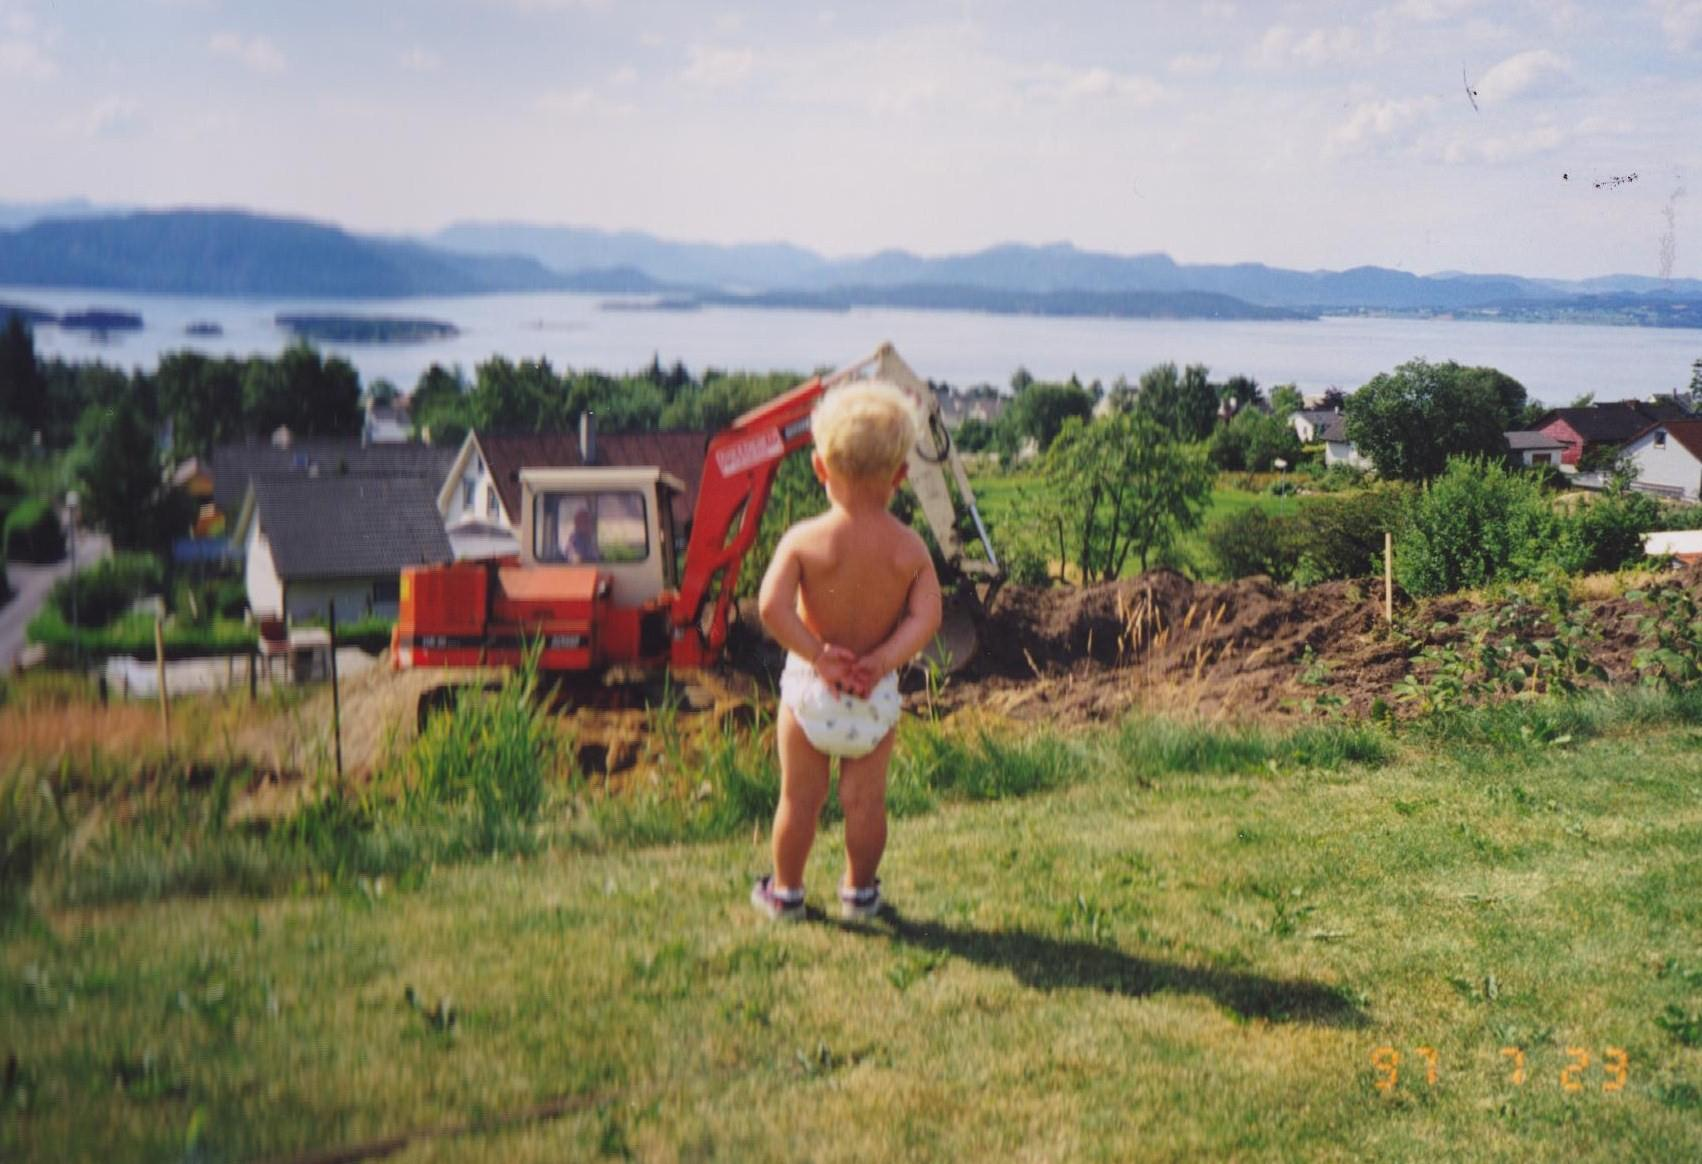

Get an actual scientist to do that…

## Condition

Now let's actually involve the data

<div class="fragment (appear)">

We can condition a `Model` as so

``` julia
# Condition on the observations.
model = epidemic_model(SIRProblem(N), prior_improved)
model_conditioned = model | (in_bed = data.in_bed,)
```

</div>
<div class="fragment (appear)">

You know what time it is: *inference time*!

</div>

## Metropolis-Hastings (MH)

``` julia
chain_mh = sample(model_conditioned, MH(), MCMCThreads(), 10_000, 4; discard_initial=5_000);
```

Rhat is *okay-ish* but not great, and ESS is pretty low innit?

``` julia
plot(chain_mh; size=(800, 500))
```

Eeehh doesn't look the greatest

Difficult to trust these results, but let's check if it at least did
*something* useful

``` julia
# We're using the unconditioned model!
predictions_mh = predict(model, chain_mh)
```

``` julia
plot_trajectories!(plot(legend=false, size=(600, 300)), predictions_mh; data=data)
```

``` julia
plot_trajectory_quantiles!(plot(legend=false, size=(600, 300)), predictions_mh; data=data)
```

Okay, it's not *completely* useless, but my trust-issues are still
present.

Metropolis-Hastings have disappointed me one too many times before.

## So instead, let's go `NUTS`

That's right, we're reaching for the **No U-Turn sampler (NUTS)**

### 

[<https://chi-feng.github.io/mcmc-demo/app.html>](https://chi-feng.github.io/mcmc-demo/app.html)

## 

> Wooaah there! `NUTS` requires gradient information!
>
> How are you going to get that through that `solve`?

Good question, voice in my head

I'm obviously not going to it myself

## Automatic differentiation (AD) in Julia

-   [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl):
    forward-mode AD *(default in Turing.jl)*
-   [ReverseDiff.jl](https://github.com/JuliaDiff/ReverseDiff.jl):
    tape-based reverse-mode AD
-   [Zygote.jl](https://github.com/FluxML/Zygote.jl): source-to-source
    reverse-mode AD
-   And more…

<div class="fragment (appear)">

Up-and-coming

-   [Enzyme.jl](https://github.com/EnzymeAD/Enzyme.jl): Julia bindings
    for [Enzyme](https://github.com/EnzymeAD/Enzyme.jl) which ADs LLVM
    (low-level)
-   [Diffractor.jl](https://github.com/JuliaDiff/Diffractor.jl):
    experimental mixed-mode AD meant to replace Zygote.jl

</div>
<div class="fragment (appear)">

Of importance

-   [ChainRulesCore.jl](https://github.com/JuliaDiff/ChainRulesCore.jl):
    light-weight package for defining rules, compatible with many of the
    above

</div>
**Important**

> When you write code, you don't have to make a choice which one you
> want to use!

All the (stable) ones, will (mostly) work

*But* how you write code will affect performance characteristics

Takes a bit of know-how + a bit of digging to go properly "vroom!"

## Differentiating through `solve`

With that being said, differentiating through numerical `solve` is not
necessarily trivial to do efficiently

There are numerous ways of approaching this problem

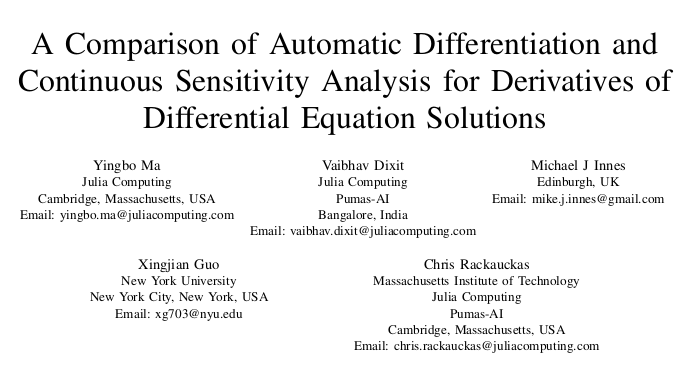

[<https://arxiv.org/abs/1812.01892>](https://arxiv.org/abs/1812.01892)
is *great* resource

<div class="fragment (appear)">

But this is why we have
[`SciMLSensitivity.jl`](https://github.com/SciML/SciMLSensitivity.jl)

[SciMLSensitivity.jl
docs](https://docs.sciml.ai/SciMLSensitivity/stable/manual/differential_equation_sensitivities/#Choosing-a-Sensitivity-Algorithm)
also provides a great overview of different approaches

</div>
``` julia
using SciMLSensitivity
```

It offers

1.  *Discrete sensitivity analysis* or the *"Direct" method*: just use
    `ForwardDiff.Dual` in the `solve`.
2.  *Continuous local sensitivity analysis (CSA)*: extends the original
    system such that the `solve` gives you both the solution and the the
    gradient simultaenously.
3.  *Adjoint methods*: construct a backwards system whose solution gives
    us the gradient.

Just do `solve(problem, solver, sensealg = ...)`

## Back to being `NUTS`

``` julia
chain = sample(model_conditioned, NUTS(0.8), MCMCThreads(), 1000, 4);
```

``` julia
chain
```

Muuuch better! Both ESS and Rhat is looking good

``` julia
plot(chain; size=(800, 500))
```

``` julia
# Predict using the results from NUTS.
predictions = predict(model, chain)
```

``` julia
plot_trajectories!(plot(legend=false, size=(600, 300)), predictions; n = 1000, data=data)
```

``` julia
plot_trajectory_quantiles!(plot(legend=false, size=(600, 300)), predictions; data=data)
```

## Simulation-based calibration (SBC) [Talts et. al. (2018)](https://arxiv.org/abs/1804.06788)

1.  Sample from prior $\theta_1, \dots, \theta_n \sim p(\theta)$.
2.  Sample datasets $\mathcal{D}_i \sim p(\cdot \mid \theta_i)$ for
    $i = 1, \dots, n$.
3.  Obtain (approximate) $p(\theta \mid \mathcal{D}_i)$ for
    $i = 1, \dots, n$.

For large enough (n), the "combination" of the posteriors should recover
the prior!

"Combination" here usually means computing some statistic and comparing
against what it should be

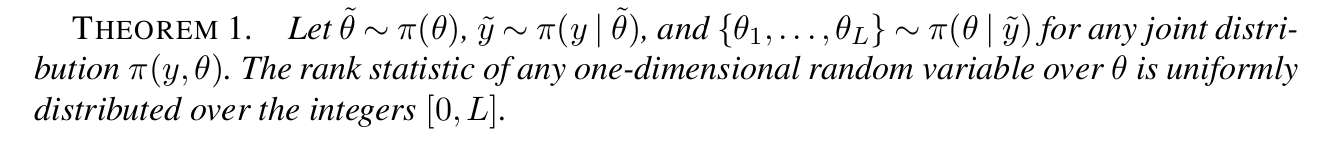

That's very expensive → in practice we just do this once or twice

``` julia
# Sample from the conditioned model so we don't get the `in_bed` variables too
using Random  # Just making sure the numbers of somewhat interesting
rng = MersenneTwister(43);
test_values = rand(rng, NamedTuple, model_conditioned)
```

Now we condition on those values and run once to generate data

``` julia
model_test = model | test_values
```

``` julia
in_best_test = rand(rng, model_test).in_bed;
```

Next, inference!

``` julia
model_test_conditioned = model | (in_bed = in_best_test,)
```

``` julia
# Let's just do a single chain here.
chain_test = sample(model_test_conditioned, NUTS(0.8), 1000);
```

Did we recover the parameters?

<div class="small-text">

``` julia
ps = []
for sym in [:β, :γ, :ϕ⁻¹]
    p = density(chain_test[:, [sym], :])
    vline!([test_values[sym]])
    push!(ps, p)
end
plot(ps..., layout=(3, 1), size=(600, 400))
```

</div>

Yay!

## Samplers in Turing.jl

-   Metropolis-Hastings, MALA, emcee
    ([AdvancedMH.jl](https://github.com/TuringLang/AdvancedMH.jl))
-   Hamiltonian Monte Carlo, NUTS
    ([AdvancedHMC.jl](https://github.com/TuringLang/AdvancedMH.jl))
-   SMC ([AdvancedPS.jl](https://github.com/TuringLang/AdvancedPS.jl))
-   Elliptical Slice Sampling
    ([EllipticalSliceSampling.jl](https://github.com/TuringLang/EllipticalSliceSampling.jl))
-   Nested sampling
    ([NestedSamplers.jl](https://github.com/TuringLang/NestedSamplers.jl))
-   (Experimental) Tempered sampling
    ([Pigeons.jl](https://github.com/Julia-Tempering/Pigeons.jl) and
    [MCMCTempering.jl](https://github.com/TuringLang/MCMCTempering.jl))

You can also combine some of these in Turing.jl

<div class="small-text">

``` julia
using LinearAlgebra: I

@model function linear_regression(X)
    num_params = size(X, 1)
    β ~ MvNormal(ones(num_params))
    σ² ~ InverseGamma(2, 3)
    y ~ MvNormal(vec(β' * X), σ² * I)
end

# Generate some dummy data.
X = randn(2, 1_000); lin_reg = linear_regression(X); true_vals = rand(lin_reg)

# Condition.
lin_reg_conditioned = lin_reg | (y = true_vals.y,);
```

We can then do `Gibbs` but sampling $β$ using `ESS` and $\sigma^2$ using
`HMC`

``` julia
chain_ess_hmc = sample(lin_reg_conditioned, Gibbs(ESS(:β), HMC(1e-3, 16, :σ²)), 1_000);
```

</div>
<div class="small-text">

``` julia
chain_ess_hmc
```

Could potentially lead to improvements

**NOTE:** Usually *very* difficult to choose sampler parameters in this
case

</div>
Means one can also mix discrete and continuous

<div class="small-text">

``` julia
@model function mixture(n)
    cluster ~ filldist(Categorical([0.25, 0.75]), n)
    μ ~ MvNormal([-10.0, 10.0], I)
    x ~ product_distribution(Normal.(μ[cluster], 1))
end

model_mixture = mixture(10)
fake_values_mixture = rand(model_mixture)
model_mixture_conditioned = model_mixture | (x = fake_values_mixture.x, )
chain_discrete = sample(
    model_mixture_conditioned, Gibbs(PG(10, :cluster), HMC(1e-3, 16, :μ)), MCMCThreads(), 1_000, 4
)
```

</div>
<div class="x-small-text">

``` julia
ps = []
for (i, realizations) in enumerate(eachcol(Array(group(chain_discrete, :cluster))))
    p = density(
        realizations,
        legend=false,
        ticks=false,
        border=:none
    )
    vline!(p, [fake_values_mixture.cluster[i]])
    push!(ps, p)
end
plot(ps..., layout=(length(ps) ÷ 2, 2), size=(600, 40 * length(ps)))
```

</div>

Again, this is difficult to get to work properly on non-trivial examples

<u>But</u> it is possible

## Other utilities for Turing.jl

-   [TuringGLM.jl](https://github.com/TuringLang/TuringGLM.jl): GLMs
    using the formula-syntax from R but using Turing.jl under the hood
-   [TuringBenchmarking.jl](https://github.com/TuringLang/TuringBenchmarking.jl):
    useful for benchmarking Turing.jl models
-   [TuringCallbacks.jl](https://github.com/TuringLang/TuringCallbacks.jl):
    on-the-fly visualizations using `tensorboard`

### TuringGLM.jl

``` julia
using TuringGLM
```

We'll use the KidIQ dataset for a quick example

``` julia
register(DataDep(
    "kidiq",
    "Survey of adult American women and their respective children from 2007",
    "https://raw.githubusercontent.com/TuringLang/TuringGLM.jl/bbc9129fc2d1ff7a1026fe2189b6580303d5c9f5/data/kidiq.csv",
))
```

``` julia
fname = joinpath(datadep"kidiq", "kidiq.csv")
kidiq = DataFrame(CSV.File(fname))
```

Now we can create the formula

``` julia
fm = @formula(kid_score ~ mom_hs * mom_iq)
```

which can then easily be converted into a Turing.jl-model

``` julia
model = turing_model(fm, kidiq);
```

And then we can use our standard Turing.jl workflow:

``` julia
chns = sample(model, NUTS(), 1000)
```

### TuringCallbacks.jl

``` julia
using TuringCallbacks
```

``` julia
model = simple_demo(1.5, 2.0);
```

``` julia
logdir = mktempdir()
```

``` julia
callback = TensorBoardCallback(joinpath(logdir, "logs"); include_hyperparams=true)
chain = sample(model, NUTS(0.8), 1000; callback=callback);
```

If you have `tensorboard` installed, you can then run

``` bash
python3 -m tensorboard.main --logdir /tmp/jl_uVazSd
```

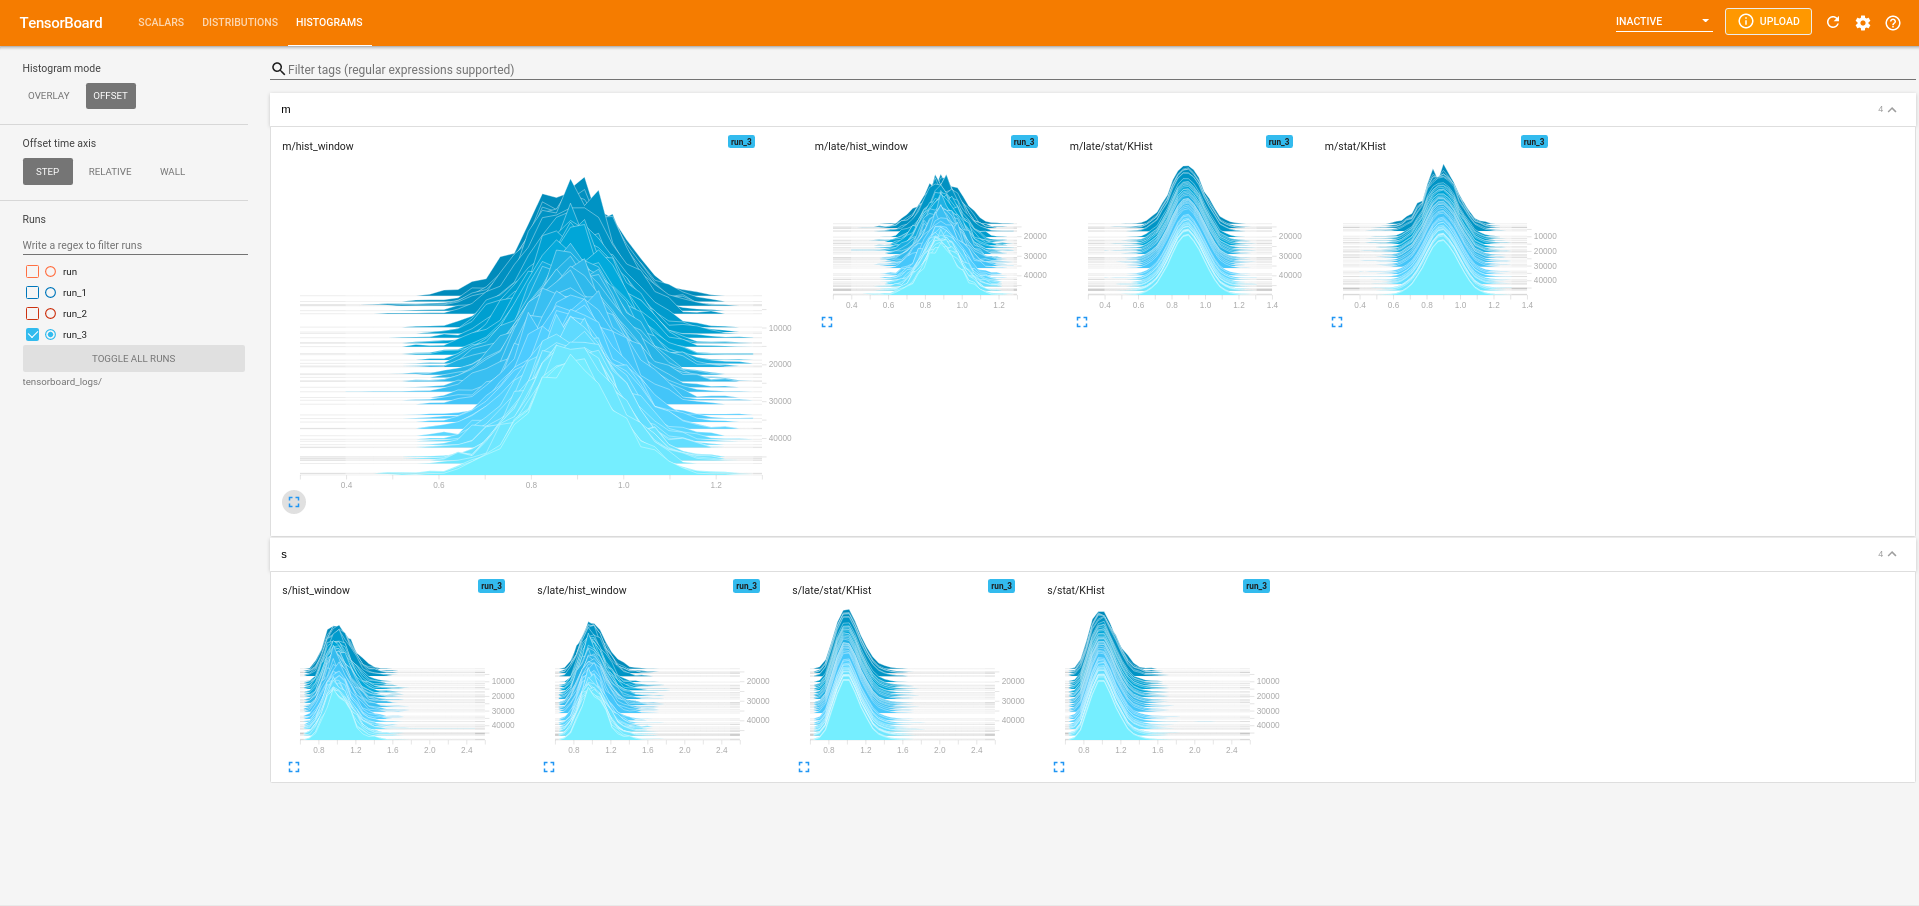

Can inspect hyperparameters, e.g. target acceptance rate for `NUTS`

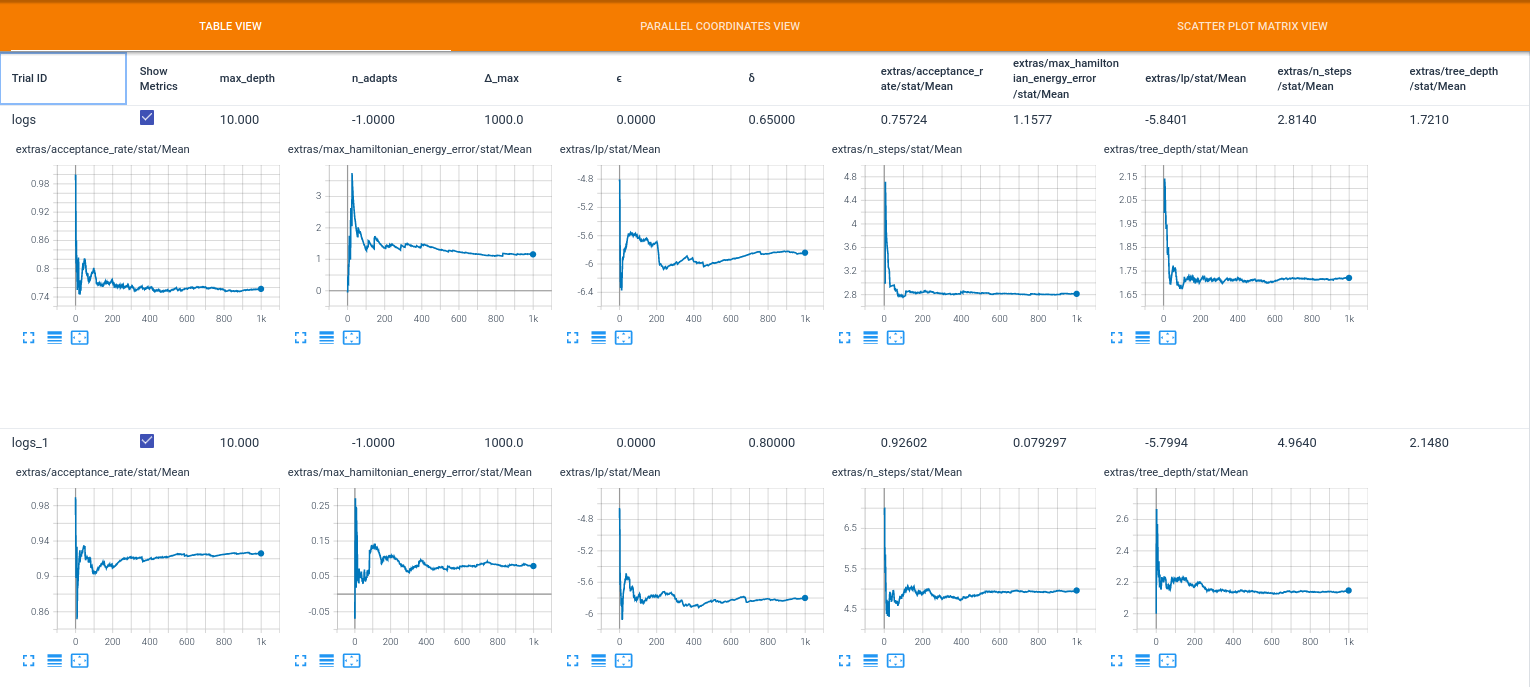

## Downsides of using Turing.jl

-   ${\color{red} \times}$ No depedency-extraction of the model
    -   ⟹ can't do things like automatic marginalization
    -   *But* it's not impossible; just a matter of development effort
    -   ${\color{green} \checkmark}$ And we have JuliaBUGS now!
-   ${\color{red} \times}$ NUTS performance is at the mercy of AD in
    Julia
-   ${\color{green} \checkmark}$ You <u>can</u> put anything in a model
-   ${\color{red} \times}$ Whether you <u>should</u> put anything in a
    model is a another matter

# Setting up a project environment

Now we're going to do some live-coding!

## What we're doing

1.  Create project.
    -   What does that mean?
2.  Add dependencies.
    -   Project.toml and Manifest.toml
    -   Dependencies we need
3.  Get our S(?)IR implementation into the project.
4.  Run some experiments.
    -   Use Pluto.jl notebook to get started
    -   Move into a script if we have time

# Case study

It's time to do a case study!

But on which dataset?

**You're own!**

But if you don't have one, here are some alternatives:

1.  Lotka-Volterra model for snowhoe hares and Canadian lynxes
    -   A classic example of predator-prey dynamics
2.  Cockroaches in residential buildings throughout New York
    -   Become your landlord's favorite tenant by minimizing cockroach
        complaints in residential buildings while keeping costs low
3.  Synthetic time-series model
    -   A syncthetic time-series with periodic behavior
4.  S(?)IR modeling of influenza
    -   You already have the data; go knock yourself out!
5.  Pick one from RDatasets.jl

Go to the next slides for more details

## 1. Lotka-Volterra Predator-Prey model

<div class="small-text">
<div class="side-by-side">
<div>

The species of interest in this case study are:

-   Snowshoe hares, an hervivorous cousin of rabbits
-   Canadian lynxes, a feline predator whose diet consists largely of
    snowshoe hares

</div>
<div>

Use Lotka-Volterra equations to model the population dynamics

\begin{equation*}
\begin{aligned}
\frac{dH}{dt} &= \alpha H - \beta H L \\
\frac{dL}{dt} &= \delta H L - \gamma L
\end{aligned}
\end{equation*}

</div>
</div>

Use Turing.jl to infer the parameters

-   $\alpha$: growth rate of the prey population
-   $\beta$: rate of shrinkage of the prey population
-   $\delta$: rate of growth of the predator population
-   $\gamma$: rate of shrinkage of the predator population

[Source (but don't
look!)](https://mc-stan.org/users/documentation/case-studies/lotka-volterra-predator-prey.html)

</div>
<div class="small-text">

``` julia
register(DataDep(
    "hares-and-lynxes",
    "Numerical data for the number of pelts collected by the Hudson’s Bay Company in the years 1900-1920.",
    "https://raw.githubusercontent.com/stan-dev/example-models/master/knitr/lotka-volterra/hudson-bay-lynx-hare.csv",
))
```

And then we can load it

``` julia
df = DataFrame(
    CSV.File(
        joinpath(datadep"hares-and-lynxes", "hudson-bay-lynx-hare.csv"),
        skipto=4,
        header=3
    )
)
```

</div>

## 2. Cockroaches in New York

<div class="x-small-text">

> Imagine that you are a statistician or data scientist working as an
> independent contractor. One of your clients is a company that owns
> many residential buildings throughout New York City. The property
> manager explains that they are concerned about the number of cockroach
> complaints that they receive from their buildings. Previously the
> company has offered monthly visits from a pest inspector as a solution
> to this problem. While this is the default solution of many property
> managers in NYC, the tenants are rarely home when the inspector
> visits, and so the manager reasons that this is a relatively expensive
> solution that is currently not very effective.
>
> One alternative to this problem is to deploy long term bait stations.
> In this alternative, child and pet safe bait stations are installed
> throughout the apartment building. Cockroaches obtain quick acting
> poison from these stations and distribute it throughout the colony.
> The manufacturer of these bait stations provides some indication of
> the space-to-bait efficacy, but the manager suspects that this
> guidance was not calculated with NYC roaches in mind. NYC roaches, the
> manager rationalizes, have more hustle than traditional roaches; and
> NYC buildings are built differently than other common residential
> buildings in the US. This is particularly important as the unit cost
> for each bait station per year is quite high.

[Source #1](https://github.com/jgabry/stancon2018helsinki_intro) and
[Source #2](https://github.com/jgabry/stancon2018helsinki_intro) <u>(but
don't look!)</u>

</div>
<div class="x-small-text">

The manager wishes to employ your services to help them to find the
optimal number of roach bait stations they should place in each of their
buildings in order to minimize the number of cockroach complaints while
also keeping expenditure on pest control affordable.

A subset of the company's buildings have been randomly selected for an
experiment:

-   At the beginning of each month, a pest inspector randomly places a
    number of bait stations throughout the building, without knowledge
    of the current cockroach levels in the building
-   At the end of the month, the manager records the total number of
    cockroach complaints in that building.
-   The manager would like to determine the optimal number of traps
    (`traps`) that balances the lost revenue (`R`) such that complaints
    (`complaints`) generate with the all-in cost of maintaining the
    traps (`TC`).

Formally, we are interested in finding

\begin{equation*}
\arg \max_{\mathrm{traps} \in \mathbb{N}} \mathbb{E}_{\mathrm{complaints}} \big[ R \big( \mathrm{complaints}(\mathrm{traps}) \big) - \mathrm{TC}(\mathrm{traps}) \big]
\end{equation*}

The property manager would also, if possible, like to learn how these
results generalize to buildings they haven't treated so they can
understand the potential costs of pest control at buildings they are
acquiring as well as for the rest of their building portfolio.

As the property manager has complete control over the number of traps
set, the random variable contributing to this expectation is the number
of complaints given the number of traps. We will model the number of
complaints as a function of the number of traps.

</div>
``` julia
DataFrame(CSV.File(joinpath("data", "pest_data.csv")))
```

## 3. Synthetic time-series

Or you can have a go at this synthetic time-series example

<div class="side-by-side small-text">
<div>

``` julia
DataFrame(CSV.File(
    joinpath("data", "time-series.csv")
))
```

</div>
<div class="center">

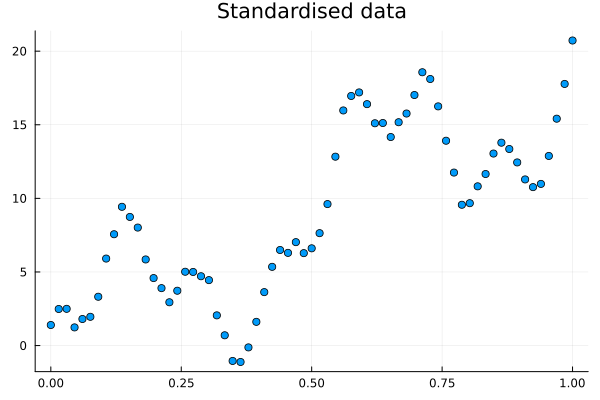

</div>
</div>

## 4. Influenza at British boarding school (same as before)

An outbreak of influenza A (H1N1) in 1978 at a British boarding school

-   763 male students -\> 512 of which became ill
-   Reported that one infected boy started the epidemic
-   Observations are number of boys in bed over 14 days

Data are freely available in the R package `outbreaks`, maintained as
part of the [R Epidemics
Consortium](http://www.repidemicsconsortium.org/)

``` julia
DataFrame(CSV.File(joinpath("data", "influenza_england_1978_school.csv")))
```

## 5. Anything from `RDatasets.jl`

Or you can just do `]add RDatasets` and knock yourself out

<https://github.com/JuliaStats/RDatasets.jl>

# Julia: The Good, the Bad, and the Ugly

An honest take from a little 27-year old Norwegian boy

### The Good

-   Speed
-   Composability (thank you multiple dispatch)
-   No need to tie yourself to an underlying computational framework
-   Interactive
-   Transparency
-   Very easy to call into other languages

### Speed

I think you got this already…

### Composability

We've seen some of that

Defining `infected(problem_wrapper, u)` allowed us to abstract away how
to extract the compartment of interest

### Transparency

For starters, almost all the code you'll end up using is pure Julia

Hence, you can always look at the code

You can find the implementation by using `@which`

``` julia
# Without arguments
@which sum
```

``` julia
# With arguments
@which sum([1.0])
```

And yeah, you can even look into the macros

<div class="small-text">

``` julia
@macroexpand @model f() = x ~ Normal()
```

</div>
I told you didn't want to see that.

Can make it *a bit* cleaner by removing linenums:

<div class="x-small-text">

``` julia
@macroexpand(@model f() = x ~ Normal()) |> Base.remove_linenums!
```

</div>
``` julia
f(x) = 2x
```

You can inspect the type-inferred and lowered code

``` julia
@code_typed f(1)
```

You can inspect the LLVM code

``` julia
@code_llvm f(1)
```

And even the resulting machine code

``` julia
@code_native f(1)
```

It really just depends on which level of "I hate my life" you're
currently at

### Calling into other languages

-   [C and Fortran comes built-in
    stdlib](https://docs.julialang.org/en/v1/manual/calling-c-and-fortran-code/)
-   [RCall.jl](https://juliainterop.github.io/RCall.jl/stable/): call
    into `R`
-   [PyCall.jl](https://github.com/JuliaPy/PyCall.jl): call into
    `python`
-   Etc.

When working with `Array`, etc. memory is usually shared ⟹ fairly low
overhead

### C and Fortran

``` julia
# Define the Julia function
function mycompare(a, b)::Cint
    println("mycompare($a, $b)")  # NOTE: Let's look at the comparisons made.
    return (a < b) ? -1 : ((a > b) ? +1 : 0)
end

# Get the corresponding C function pointer.
mycompare_c = @cfunction(mycompare, Cint, (Ref{Cdouble}, Ref{Cdouble}))

# Array to sort.
arr = [1.3, -2.7, 4.4, 3.1];

# Call in-place quicksort.
ccall(:qsort, Cvoid, (Ptr{Cdouble}, Csize_t, Csize_t, Ptr{Cvoid}),
      arr, length(arr), sizeof(eltype(arr)), mycompare_c)
```

``` julia
# All sorted!
arr
```

[Example is from Julia
docs](https://docs.julialang.org/en/v1/manual/calling-c-and-fortran-code/#Creating-C-Compatible-Julia-Function-Pointers)

### The Bad

Sometimes

-   your code might just slow down without a seemingly good reason,
-   someone did bad, and Julia can't tell which method to call, or
-   someone forces the Julia compiler to compile insane amounts of code

### "Why is my code suddenly slow?"

One word: **type-instability**

Sometimes the Julia compiler can't quite infer what types fully

<div class="fragment (appear)">

**Result:** python-like performance (for those particular function
calls)

``` julia
# NOTE: this is NOT `const`, and so it could become some other type
# at any given point without `my_func` knowing about it!
global_variable = 1
my_func_unstable(x) = global_variable * x
```

``` julia
using BenchmarkTools
@btime my_func_unstable(2.0);
```

</div>
Luckily there are tools for inspecting this

``` julia
@code_warntype my_func_unstable(2.0)
```

See that `Any` there? <u>'tis a big no-no!</u>

Once discovered, it can be fixed

``` julia
const constant_global_variable = 1
my_func_fixed(x) = constant_global_variable * x
@code_warntype my_func_fixed(2.0)
```

So long Python performance!

``` julia
@btime my_func_fixed(2.0);
```

*But* this is not always so easy to discover (though this is generally
rare)

``` julia
# HACK: Here we explicitly tell Julia what type `my_func_unstable`
# returns. This is _very_ rarely a good idea because it just hides
# the underlying problem from `@code_warntype`!
my_func_forced(x) = my_func_unstable(x)::typeof(x)
@code_warntype my_func_forced(2.0)
```

We can still see the `Any` in there, but on a first glance it looks like
`my_func_forced` is type-stable

There are more natural cases where this might occur, e.g. unfortunate
closures deep in your callstack

To discovery these there are a couple of more advanced tools:

-   [Cthulhu.jl](https://github.com/JuliaDebug/Cthulhu.jl): Allows you
    to step through your code like a debugger and perform
    `@code_warntype`
-   [JET.jl](https://github.com/aviatesk/JET.jl): Experimental package
    which attempts to automate the process

And even simpler: profile using
[ProfileView.jl](https://github.com/timholy/ProfileView.jl) and look for
code-paths that *should* be fast but take up a lot of the runtime

``` julia
using ProfileView
```

``` julia
@profview foreach(_ -> my_func_unstable(2.0), 1_000_000)
```

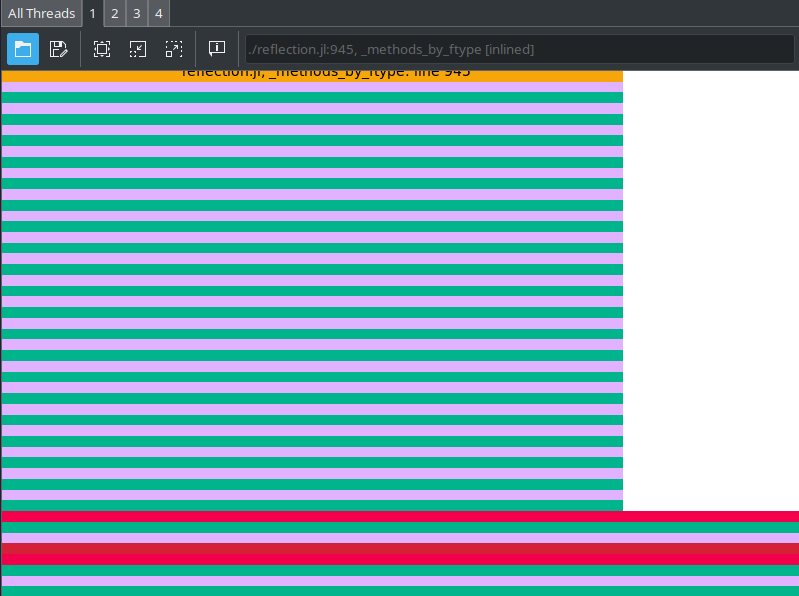

Note that there's no sign of multiplication here

But most of the runtime is the `./reflection.jl` at the top there

That's Julia looking up the type at runtime

### Method ambiguity

``` julia
ambiguous_function(x, y::Int) = y
ambiguous_function(x::Int, y) = x

# NOTE: Here we have `ambiguous_function(x::Int, y::Int)`
# Which one should we hit?!
ambiguous_function(1, 2)
```

But here Julia warns us, and so we can fix this by just doing as it
says: define `ambiguous_function(::Int64, ::Int64)`

``` julia
ambiguous_function(::Int64, ::Int64) = "neato"
ambiguous_function(1, 2)
```

### Long compilation times

In Julia, for better or worse, we can generate code

**Problem:** it can be *lots* of code of we really want to

**Result:** first execution can be *slow*

<div class="fragment (appear)">

**Time to first plot (TTFP)** is Julia's worst enemy

But things are always improving

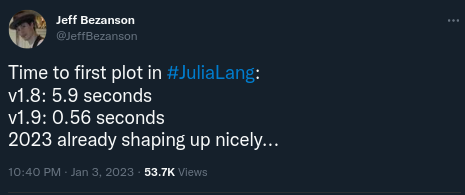

</div>

### Another example: mis-use of `@generated`

``` julia
# NOTE: `@generated` only has access to static information, e.g. types of arguments.
# Here I'm using the special type `Val` to make a number `N` static.
@generated function unrolled_addition(::Val{N}) where {N}
    expr = Expr(:block)
    push!(expr.args, :(x = 0))
    for i = 1:N
        push!(expr.args, :(x += $(3.14 * i)))
    end

    return expr
end
```

When I call this with some `Val(N)`, Julia will execute this *at
compile-time*!

``` julia
# NOTE: At runtime, it then just returns the result immediately
@code_typed unrolled_addition(Val(10))
```

But if I just change the value `10` to `11`, it's a *completely*
different type!

So Julia has to compile `unrolled_addition` from scratch

``` julia
@time @eval unrolled_addition(Val(11));
```

Or a bit crazier

``` julia
@time @eval unrolled_addition(Val(10_001));
```

Here it took ~0.4s, of which 99.95% was compilation time

I think you get the idea

But boy is it fast to run!

``` julia
@btime unrolled_addition(Val(10_001));
```

``` julia
function not_unrolled_addition(N)
    x = 0
    for i = 1:N
        x += 3.14 * i
    end

    return x
end
```

``` julia
@btime not_unrolled_addition(10_001);
```

**Funny side-note:** at first I did the following

``` julia
@generated function unrolled_addition_old(::Val{N}) where {N}
    expr = Expr(:block)
    push!(expr.args, :(x = 0))
    for i = 1:N
        push!(expr.args, :(x += $i))  # NOTE: No 3.14!
    end
    return expr
end
function not_unrolled_addition_old(N)
    x = 0
    for i = 1:N
        x += i  # NOTE: No 3.14!
    end
    return x
end
```

``` julia
@btime unrolled_addition_old(Val(10_001));
@btime not_unrolled_addition_old(10_001);
```

LLVM probably recognized the pattern of `not_unrolled_addition_old` and
unrolls it for us

Let's check!

``` julia
# NOTE: The one LLVM failed to unroll
@code_llvm not_unrolled_addition(10_001)
```

``` julia
# NOTE: The one LLVM seems to have unrolled.
@code_llvm not_unrolled_addition_old(10_001)
```

### The Ugly

<u>**Reverse-mode automatic differentiation**</u>

ForwardDiff.jl is a pure joy, but slows down as dimensionality grows

Then one should reach for ReverseDiff.jl or Zygote.jl

<div class="fragment (appear)">

Most of the time it works really well, but sometimes you hit a real
sharp edge

And sharp edges cut; they cut *deep*

Like <u>"16X slower when the function is implemented more
efficiently"-deep</u>

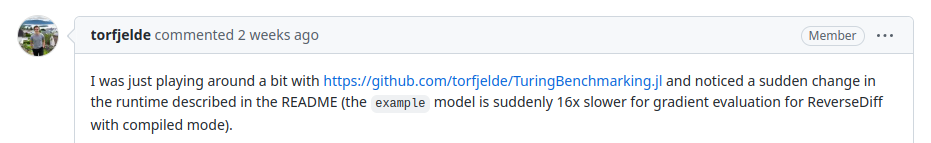

</div>
<div class="fragment (appear)">

If you want to see a man in pain, you can find the full issue
[here](https://github.com/TuringLang/Turing.jl/issues/1934)

On the flip-side, once addressed (a type-instability), it's [3X faster
than before](https://github.com/TuringLang/DistributionsAD.jl/pull/231)

</div>

### Overall

Julia is pretty darn awesome

Easy to get going, and you can always make it faster by just optimizing
<u>Julia</u> code

No need to drop down to C++

Buuuut it can't beat Python at deep learning

Otherwise, it's worth a try

Godspeed to you

# Fin